In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.3MB/s 
     |████████████████████████████████| 6.5MB 38.2MB/s 
     |████████████████████████████████| 14.8MB 259kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import nltk
nltk.download('popular')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.collocations import (
    BigramAssocMeasures,
    BigramCollocationFinder)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from collections import Counter
import random 
import re
import string 
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
from wordcloud import WordCloud
import geopandas as gpd
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


from sklearn import preprocessing

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

#ОЗНАКОМИМСЯ С ДАННЫМИ

In [ ]:
listings = pd.read_csv('listings.csv')
listings.head(3)

id  ... reviews_per_month
0  2737  ...              0.10
1  2903  ...              0.37
2  3079  ...              0.14

[3 rows x 74 columns]

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28151 entries, 0 to 28150
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28151 non-null  int64  
 1   listing_url                                   28151 non-null  object 
 2   scrape_id                                     28151 non-null  int64  
 3   last_scraped                                  28151 non-null  object 
 4   name                                          28144 non-null  object 
 5   description                                   27667 non-null  object 
 6   neighborhood_overview                         18393 non-null  object 
 7   picture_url                                   28149 non-null  object 
 8   host_id                                       28151 non-null  int64  
 9   host_url                                      28151 non-null 

#ПРОВЕДЕМ ОЧИСТКУ И ПОДГОТОВКУ ДАННЫХ ДЛЯ АНАЛИЗА

In [ ]:
# пропуски
for column in listings:
        missings = listings[column].isnull().mean()
        print(f'{column} - {missings :.1%}')

id - 0.0%
listing_url - 0.0%
scrape_id - 0.0%
last_scraped - 0.0%
name - 0.0%
description - 1.7%
neighborhood_overview - 34.7%
picture_url - 0.0%
host_id - 0.0%
host_url - 0.0%
host_name - 0.0%
host_since - 0.0%
host_location - 0.2%
host_about - 43.3%
host_response_time - 39.7%
host_response_rate - 39.7%
host_acceptance_rate - 22.7%
host_is_superhost - 0.0%
host_thumbnail_url - 0.0%
host_picture_url - 0.0%
host_neighbourhood - 27.2%
host_listings_count - 0.0%
host_total_listings_count - 0.0%
host_verifications - 0.0%
host_has_profile_pic - 0.0%
host_identity_verified - 0.0%
neighbourhood - 34.7%
neighbourhood_cleansed - 0.0%
neighbourhood_group_cleansed - 100.0%
latitude - 0.0%
longitude - 0.0%
property_type - 0.0%
room_type - 0.0%
accommodates - 0.0%
bathrooms - 100.0%
bathrooms_text - 0.1%
bedrooms - 3.2%
beds - 0.7%
amenities - 0.0%
price - 0.0%
minimum_nights - 0.0%
maximum_nights - 0.0%
minimum_minimum_nights - 0.0%
maximum_minimum_nights - 0.0%
minimum_maximum_nights - 0.0%
maxim

Text(0.5, 1.0, 'Missing Values Exploration by Columns')

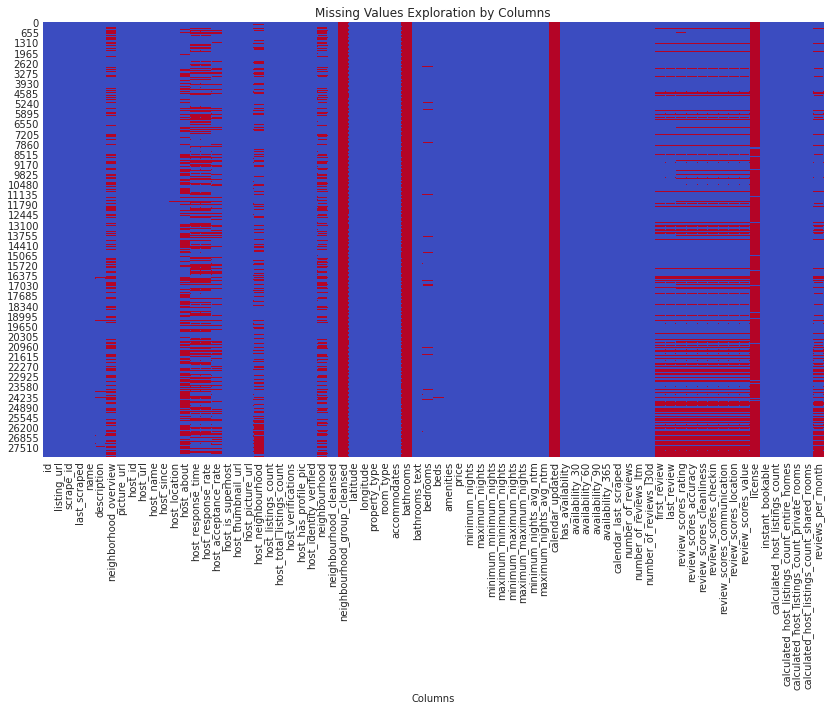

In [ ]:
# пропуски визуально
plt.figure(figsize=(14,8))
sns.heatmap(listings.isnull(), cbar=False, cmap='coolwarm')
plt.xlabel('Columns')
plt.title('Missing Values Exploration by Columns')

In [ ]:
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'], format='%Y-%m-%d')

In [ ]:
listings['last_scraped'].isnull().sum()

0

(array([737776., 737778., 737780., 737782., 737784., 737786., 737788.,
        737790., 737791., 737793., 737795.]),
 <a list of 11 Text major ticklabel objects>)

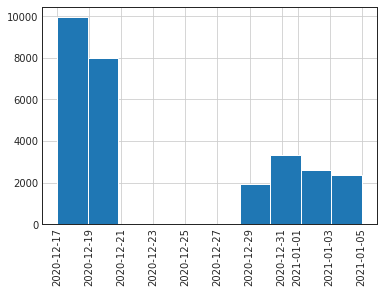

In [ ]:
# датасет содержит данные по объявлениям, которые размещались с середины декабря 2020 по начало января 2021
listings['last_scraped'].hist()
plt.xticks(rotation=90)

In [ ]:
# убираем пустые столбцы
listings.drop(columns = ['neighbourhood_group_cleansed','bathrooms', 'calendar_updated'], axis=1, inplace=True)

In [ ]:
# убираем часть данных, содержащие ссылки, которые не будут использованы
listings.drop(columns = ['scrape_id','listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1, inplace=True)

In [ ]:
# убираем часть текстовых данных, которые не будут использованы
listings.drop(columns = ['description', 'neighborhood_overview', 'neighborhood_overview', 'host_name', 'calendar_last_scraped', 
                         'host_location', 'host_about', 'neighbourhood'],  axis=1, inplace=True)

In [ ]:
# проверим на сколько схожие данные в двух столбцах
print(sum((listings['host_listings_count'] == listings['host_total_listings_count']) == False))
# расхождения только в 11 случаях

11


In [ ]:
# убираем часть данных о хосте
listings.drop(columns = ['host_response_time', 'host_neighbourhood', 'license', 'instant_bookable',
                         'host_has_profile_pic','host_total_listings_count', 'calculated_host_listings_count', 'last_scraped',
                         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [ ]:
# проверим на сколько схожие данные в двух столбцах
print(sum((listings['maximum_nights'] == listings['maximum_maximum_nights']) == False))

6856


In [ ]:
# убираем часть данных о возможном количестве ночей пребывания
listings.drop(columns = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [ ]:
# проверим есть ли количественный перекос
listings['has_availability'].value_counts()

t    28131
f       20
Name: has_availability, dtype: int64

In [ ]:
# убираем часть данных о доступности жилья
listings.drop(columns = ['has_availability','availability_30', 'availability_60', 'availability_90'], axis=1, inplace=True)

In [ ]:
# убираем часть данных об отзывах
listings.drop(columns = ['number_of_reviews_ltm','number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

In [ ]:
# сделаем замену в столбцах с булевым типом данных t\f на 1\0
listings.replace({'f': 0, 't': 1}, inplace=True)

In [ ]:
# приведем цены к более удобному для обработки формату
# убираем знак "$"
listings['price'] = listings['price'].str[1:]


In [ ]:
# часть данных содержит разделитель групп разрядов в виде "," - убираем его 
listings['price'] = listings['price'].str.replace(",", "")

In [ ]:
listings['price'] = listings['price'].str[:-3]

In [ ]:
listings['price'] = listings['price'].astype('int64')

In [ ]:
# конвертируем цены в евро, курс на 10.02.2021
def euro(row):
  return row['price'] * 0.83

In [ ]:
listings['price_euro'] = listings.apply(euro, axis=1).round(0)

In [ ]:
listings.drop(columns = ['price'], axis=1, inplace=True)

***ОПИСАНИЕ ДАННЫХ***  
***признаки, взятые для анализа***
* ***id***- уникальный идентификатор предлагаемой недвижимости
* ***name*** - краткое неструктурированное описание предлагаемой недвижимости
* ***host_verifications*** - методы верификации хоста
* ***neighbourhood_cleansed*** - район города (муниципальные образования), где расположена недвижимость
* ***property_type*** - тип предлагаемой недвижимости
* ***room_type*** - тип комнаты для размещения
* ***bathrooms_text*** - количество ванных комнат
* ***amenities*** - список предлагаемых удобств
* ***host_is_superhost*** - являеся ли владелец суперхостом (особая отметка качества гостеприимства хоста, присваемая сервисом Airbnb)
* ***host_identity_verified*** - проходил ли хост верификацию аккаунта
* ***host_since*** - дата, когда хост впервые разместил объявление в сервисе
* ***first_review*** - дата размещения первого отзыва   
* ***last_review*** - дата последнего размещения отзыва
* ***host_id*** - идентификатор хоста (владельца недвижимости).
* ***host_acceptance_rate*** - на какую долю обращений гостей хост ответил согласием
* ***host_response_rate*** - доля сообщений, на которые ответил хост
* ***host_listings_count*** - количество объектов недвижимости, предлагаемых хостом
* ***latitude*** - данные о широте расположения объекта недвижимости
* ***longitude*** - данные о долготе расположения объекта недвижимости
* ***accommodates*** - сколько человек возможно разместить
* ***bedrooms*** - количество спален
* ***beds*** - количество спальных мест
* ***minimum_nights*** - минимальное количество ночей для бронирования
* ***maximum_nights*** - максимальное количество ночей для бронирования
* ***availability_365*** - количество ночей доступных для бронирования в следующие 365 дней
* ***number_of_reviews*** - количество отзывов
* ***price_euro*** - цена в евро за ночь пребывания
* ***'review_scores_rating'*** - общее впечатление гостей
* ***'review_scores_accuracy'*** - оценка недвижимости по соответствию описанию
* ***'review_scores_checkin'*** - оценка прибытия гостя
* ***'review_scores_communication'*** - оценка общения с хостом
* ***'review_scores_location'*** - оценка местоположения недвижимости
* ***'review_scores_value'*** - оценка соотношения цена/качество


       

In [ ]:
listings.shape

(28151, 34)

In [ ]:
# Основные статистические данные, включая моду
df_describe = listings.describe()
metrics = {}
for column in listings:
    metrics[column] = listings[column].mode()[0]
df_describe = pd.concat([pd.DataFrame([metrics], index = ['mode']), df_describe])
df_describe = df_describe.drop(index=['count'])
df_describe.rename(index={'50%':'median'}, inplace=True)
df_describe.round(2)

id                  name  ...  review_scores_value price_euro
mode        2737.00  TOP CENTRAL LOCATION  ...                10.00      42.00
mean    22600707.97                   NaN  ...                 9.39      90.24
std     14287539.37                   NaN  ...                 0.88     267.49
min         2737.00                   NaN  ...                 2.00       0.00
25%      9666015.50                   NaN  ...                 9.00      40.00
median  22115268.00                   NaN  ...                10.00      58.00
75%     35378061.50                   NaN  ...                10.00      86.00
max     47080490.00                   NaN  ...                10.00    8774.00

[8 rows x 34 columns]

***КАТЕГОРИАЛЬНЫЕ и ТЕКСТОВЫЕ ДАННЫЕ***

***name*** - краткое неструктурированное описание предлагаемой недвижимости

In [ ]:
# есть несколько пропусков
listings['name'].isna().sum()

7

In [ ]:
# добавим описание 'unknown' для пропущенных данных
listings['name'].fillna('unknown', inplace=True)

In [ ]:
# очистка текстовых данных
def preprocess_text(text):
    # убираем пунктуацию
    text = re.sub(r'[^\w\d\s]', ' ', text)
    # убираем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    # приводим к нижнему регистру
    text = re.sub(r'^\s+|\s+?$', '', text.lower())
    # получаем и убираем стоп слова и используем леммы
    stop_words = nltk.corpus.stopwords.words('english', 'italian')
    lemmatizer = WordNetLemmatizer() 
    return ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )

In [ ]:
listings['name'] = listings['name'].apply(lambda row : preprocess_text(row))

In [ ]:
# описание недвижмости достаточно оригинальны, полных повторов немного
listings['name'].value_counts()

heart rome                                 17
home rome                                  13
room rome                                  13
camera tripla                              12
camera matrimoniale                        12
                                           ..
dream rom                                   1
cosy room private bathroom central rome     1
jacuzzi behind st peter dome                1
nerva boutique hotel superior room          1
la finestra sull albero                     1
Name: name, Length: 26880, dtype: int64

In [ ]:
# полученные данные больше относятся к описанию, чем названию - переименуем
listings.rename(columns={'name':'description'}, inplace=True)

***host_verifications*** - методы верификации хоста

In [ ]:
# пропусков нет
listings['host_verifications'].isna().sum()

0

In [ ]:
listings['host_verifications'] = listings['host_verifications'].apply(lambda row : preprocess_text(row))

In [ ]:
listings['host_verifications'].value_counts(normalize=True).round(2)

email phone                                                                                                               0.12
email phone review jumio government_id                                                                                    0.12
email phone review jumio offline_government_id selfie government_id identity_manual                                       0.10
email phone review jumio offline_government_id government_id                                                              0.08
email phone review                                                                                                        0.07
                                                                                                                          ... 
email phone facebook review jumio offline_government_id sent_id selfie government_id identity_manual                      0.00
email phone facebook google review offline_government_id kba government_id work_email                          

***neighbourhood_cleansed*** - район города (муниципальное образование), где расположена недвижимость

In [ ]:
# пропусков нет
listings['neighbourhood_cleansed'].isna().sum()

0

In [ ]:
# переименуем для краткости
listings.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

In [ ]:
# предложения распределены по 15 муниципальным образованиям Рима неравномерно
# 54% всей предлагаемой недвижимости расположено в историческом центре 
listings['neighbourhood'].value_counts(normalize=True).round(2)

I Centro Storico              0.54
VII San Giovanni/Cinecittà    0.08
II Parioli/Nomentano          0.07
XIII Aurelia                  0.06
XII Monte Verde               0.05
V Prenestino/Centocelle       0.04
VIII Appia Antica             0.03
X Ostia/Acilia                0.02
XIV Monte Mario               0.02
XI Arvalia/Portuense          0.02
IV Tiburtina                  0.02
XV Cassia/Flaminia            0.02
III Monte Sacro               0.02
IX Eur                        0.01
VI Roma delle Torri           0.01
Name: neighbourhood, dtype: float64

***property_type*** - тип предлагаемой недвижимости

In [ ]:
# пропусков нет
listings['property_type'].isna().sum()

0

In [ ]:
listings['property_type'] = listings['property_type'].apply(lambda row : preprocess_text(row))

In [ ]:
listings['property_type'].unique()

array(['private room', 'private room bed breakfast', 'entire apartment',
       'private room apartment', 'private room guesthouse', 'entire loft',
       'entire condominium', 'entire villa', 'private room guest suite',
       'private room condominium', 'room bed breakfast',
       'private room villa', 'private room house',
       'room serviced apartment', 'entire guesthouse', 'entire cottage',
       'private room loft', 'farm stay',
       'private room serviced apartment', 'entire guest suite',
       'entire bed breakfast', 'room boutique hotel', 'entire house',
       'tiny house', 'shared room apartment', 'private room boat',
       'entire serviced apartment', 'entire cabin',
       'private room nature lodge', 'shared room hostel',
       'room aparthotel', 'entire bungalow', 'room hotel',
       'entire townhouse', 'private room townhouse', 'room pension',
       'private room castle', 'private room farm stay', 'campsite',
       'entire home apt', 'shared room condominium

In [ ]:
# распределим данные именно по типу недвижимости, данные по типу комнаты есть в отдельном столбце
listings['property_type'].replace({
    'entire apartment' : 'apartment',
    'private room' : 'apartment', 
    'private room bed breakfast' : 'apartment',
    'private room apartment' : 'apartment',
    'private room guesthouse' : 'guesthouse',
    'entire loft': 'apartment',
    'entire condominium': 'apartment',
    'entire villa' : 'house',
    'private room guest suite' : 'guesthouse',
    'private room condominium' : 'apartment', 
    'room bed breakfast' : 'apartment',
    'private room villa' : 'house', 
    'private room house' : 'house',
    'room serviced apartment' : 'apartment', 
    'entire guesthouse' : 'guesthouse', 
    'entire cottage' : 'house',
    'private room loft' : 'apartment', 
    'private room serviced apartment' : 'guesthouse', 
    'entire guest suite' : 'guesthouse',
    'entire bed breakfast' : 'apartment', 
    'room boutique hotel' : 'hotel',
    'entire house' : 'house',
    'tiny house' : 'house', 
    'shared room apartment' : 'apartment',
    'private room boat' : 'boat',
    'entire serviced apartment' : 'guesthouse',
    'entire cabin' : 'boat',
    'private room nature lodge' : 'house', 
    'shared room hostel' : 'hostel',
    'room aparthotel' : 'hotel', 
    'entire bungalow' : 'house',
    'room hotel' : 'hotel',
    'entire townhouse' : 'house', 
    'private room townhouse' : 'house',
    'room pension': 'guesthouse',
    'private room castle' : 'castle', 
    'private room farm stay' : 'farm stay', 
    'campsite' : 'camp',
    'entire home apt': 'house', 
    'shared room condominium': 'apartment',
    'private room tiny house': 'house',
    'room apartment': 'apartment',
    'entire chalet' : 'house', 
    'private room resort' : 'hotel', 
    'room resort': 'hotel',
    'entire hostel' : 'hostel', 
    'entire place': 'apartment', 
    'earth house' : 'house',
    'private room hostel' : 'hostel',
    'shared room loft': 'apartment', 
    'room hostel': 'hostel',
    'private room bungalow' : 'apartment', 
    'tipi' : 'camp', 
    'shared room serviced apartment': 'guesthouse',
    'private room cottage' : 'house',
    'camper rv' : 'camp', 
    'tent' : 'camp', 
    'shared room house' : 'house',
    'shared room dorm': 'hostel', 
    'shared room bed breakfast': 'guesthouse',
    'private room cabin' : 'house',
    'private room camper rv' : 'camp',
    'shared room cabin' : 'house', 
    'entire vacation home' : 'house',
    'private room casa particular' : 'house',
    'shared room tiny house' : 'house',
    'shared room island' : 'house',
    'room nature lodge' : 'house',
    'shared room guesthouse' : 'guesthouse',
    'shared room hotel': 'hotel',
    'shared room townhouse' : 'house',
    'dome house' : 'house', 
    'casa particular' : 'house',
    'houseboat' : 'boat'
      
    }, inplace=True)

In [ ]:
# подавляющая часть предложений относится к квартирам, но есть и более экзотические варианты
listings['property_type'].value_counts(normalize=True)

apartment     0.886789
house         0.049732
hotel         0.032610
guesthouse    0.026393
hostel        0.002842
farm stay     0.000746
boat          0.000426
camp          0.000284
castle        0.000107
treehouse     0.000036
igloo         0.000036
Name: property_type, dtype: float64

***room_type*** - тип комнаты для размещения

In [ ]:
# пропусков нет
listings['room_type'].isna().sum()

0

In [ ]:
# 63% объявлений предлагают сдачу отдельной квартиры или дома
listings['room_type'].value_counts(normalize=True).round(2)

Entire home/apt    0.63
Private room       0.32
Hotel room         0.05
Shared room        0.01
Name: room_type, dtype: float64

***bathrooms_text*** - количество ванных комнат

In [ ]:
# есть небольшое количество пропусков
listings['bathrooms_text'].isna().sum()

24

In [ ]:
# заполним модой
listings['bathrooms_text'].fillna(listings['bathrooms_text'].mode()[0], inplace=True)

In [ ]:
# данные можно разделить на 2 части: количественную и булевую (является ли ванная комната личной или нет)
# дробная часть .5 в количестве не является ошибкой, обозначение 0.5 это комната, где есть только туалет и раковина
listings['bathrooms_text'].value_counts()

1 bath               14571
1 private bath        4351
2 baths               4136
1 shared bath         2179
3 baths                790
1.5 baths              761
2 shared baths         340
4 baths                244
2.5 baths              164
1.5 shared baths       155
5 baths                 97
3.5 baths               46
6 baths                 43
0 shared baths          32
4.5 baths               30
3 shared baths          30
Half-bath               27
Shared half-bath        27
2.5 shared baths        24
0 baths                 24
7 baths                 15
8 baths                 10
5.5 baths                7
6.5 baths                5
4 shared baths           4
10 baths                 4
6 shared baths           4
9 baths                  4
Private half-bath        4
12 baths                 3
4.5 shared baths         3
7.5 baths                3
6.5 shared baths         2
12.5 baths               2
5 shared baths           2
14.5 baths               1
10 shared baths          1
5

In [ ]:
# приведем данные к единому формату
listings['bathrooms_text'].replace({
    '1 bath' : '1 baths',
    '1 private bath' : '1 baths',
    'Private half-bath' : '0.5 baths',
    'Shared half-bath' : '0.5 shared baths',
    'Half-bath' : '0.5 baths',
    '0 shared baths' : '0 baths'
    }, inplace=True)

In [ ]:
# создадим отдельный столбец для количественной части показателя и извлечем его из данных
listings['bathrooms'] = listings['bathrooms_text'].str.extract('(\d\.\d|\d\d|\d)', expand=True)

In [ ]:
listings['bathrooms'] = listings['bathrooms'].astype('float64')

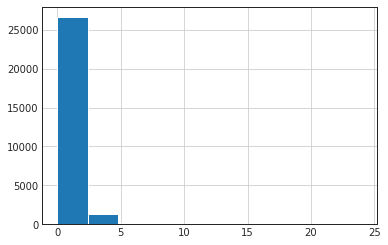

In [ ]:
# посмотрим на распределение полученного признака
listings['bathrooms'].hist()

In [ ]:
# есть нулевые данные
listings['bathrooms'].value_counts(normalize=True)

1.0     0.749565
2.0     0.159000
1.5     0.032539
3.0     0.029129
4.0     0.008810
2.5     0.006678
5.0     0.003517
0.5     0.002060
0.0     0.001989
6.0     0.001670
3.5     0.001634
4.5     0.001172
7.0     0.000533
8.0     0.000355
5.5     0.000284
6.5     0.000249
10.0    0.000213
12.0    0.000178
9.0     0.000142
7.5     0.000107
11.0    0.000036
14.0    0.000036
16.0    0.000036
8.5     0.000036
24.0    0.000036
Name: bathrooms, dtype: float64

In [ ]:
listings['bathrooms'] = listings['bathrooms'].replace(0, np.nan)

In [ ]:
# заполним пропуски медианой
listings['bathrooms'].fillna(listings['bathrooms'].median(), inplace=True)

In [ ]:
# после заполнения пропусков существенных искажений нет
listings['bathrooms'].describe()

count    28151.000000
mean         1.316010
std          0.736049
min          0.500000
25%          1.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: bathrooms, dtype: float64

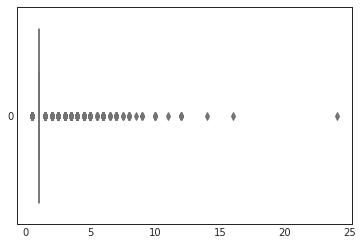

In [ ]:
# в данных есть явные выбросы, проработаем их комплексно, после очистки значений признаков beds, bedrooms и accommodates 
sns.boxplot(data=listings['bathrooms'], palette='cool', orient='h')

In [ ]:
# создадим столбец с булевым показателем - предположим, что значение относится к private, если не указано shared
listings.loc[listings['bathrooms_text'].str.contains('baths'), 'bathrooms_private'] = 1

In [ ]:
# оставшиеся значения заполним нулями
listings['bathrooms_private'].fillna(0, inplace=True)

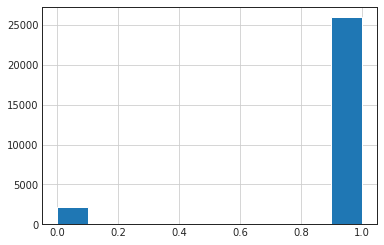

In [ ]:
# посмотрим распределение полученного признака
listings['bathrooms_private'].hist()

In [ ]:
# 92% недвижимости располагает личной ванной комнатой
listings['bathrooms_private'].value_counts(normalize=True)

1.0    0.922596
0.0    0.077404
Name: bathrooms_private, dtype: float64

In [ ]:
# удалим столбец bathrooms_text
listings.drop(columns = ['bathrooms_text'], axis=1, inplace=True)

***amenities*** - список предлагаемых удобств

In [ ]:
# пропусков нет
listings.amenities.isna().sum()

0

In [ ]:
# но данные содержат пустые списки
listings['amenities'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 91
["Breakfast", "Wifi", "Shampoo", "First aid kit", "Air conditioning", "Heating", "Fire extinguisher", "Essentials", "Elevator", "TV"]                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
# заменим их на NaN
listings['amenities'] = listings['amenities'].replace('[]', np.nan)

In [ ]:
# получим некоторое количество пропусков
listings.amenities.isna().sum()

91

In [ ]:
# добавим значение 'unknown' для пустых данных
listings['amenities'].fillna('unknown', inplace=True)

In [ ]:
# очистка текстовых данных
def preprocess_text_am(text):
    
    # убираем пунктуацию, кроме запятых
    text = re.sub(r'[^\w\s\,]', ' ', text)
    # первая буква слова заглавная
    text = re.sub(r'^\s+|\s+?$', '', text.title())
    # убираем пробелы
    text = re.sub(r'\s+', '', text)
    # получаем и убираем стоп слова и используем леммы
    stop_words = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer() 
    return ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )

In [ ]:
listings['amenities'] = listings['amenities'].apply(lambda row : preprocess_text_am(row))

In [ ]:
listings['amenities'] = listings['amenities'].str.replace(',', ' ')

In [ ]:
# подсчитаем сколько удобств предлагают в каждом из объявлений
amenities_list = []

for amenity in listings['amenities']:
    amenity = amenity[1:]
    amenity = amenity[:-1]
    x = amenity.split()
    amenities_list.append(len(x))

listings['amenities_count'] = amenities_list

In [ ]:
listings['amenities_count'].value_counts(normalize=True)

14    0.049234
13    0.045895
15    0.044936
12    0.042592
16    0.042379
        ...   
62    0.000071
55    0.000071
57    0.000036
90    0.000036
60    0.000036
Name: amenities_count, Length: 62, dtype: float64

***БУЛЕВЫЕ ДАННЫЕ***

***host_is_superhost*** - являеся ли владелец суперхостом (особая отметка качества гостеприимства хоста, присваемая сервисом Airbnb)

In [ ]:
# есть несколько пропусков
listings['host_is_superhost'].isna().sum()

11

In [ ]:
# заполним модой
listings['host_is_superhost'].fillna(listings['host_is_superhost'].mode()[0], inplace=True)

In [ ]:
# меньше четверти хостов являются суперхостами
listings['host_is_superhost'].value_counts(normalize=True)

0.0    0.737025
1.0    0.262975
Name: host_is_superhost, dtype: float64

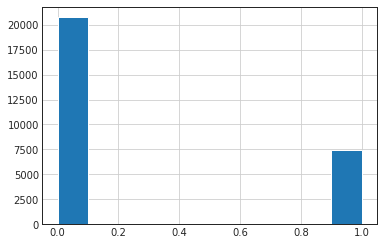

In [ ]:
listings['host_is_superhost'].hist()

***host_identity_verified*** - был ли хост верифицирован

In [ ]:
# есть несколько пропусков
listings['host_identity_verified'].isna().sum()

11

In [ ]:
# заполним модой
listings['host_identity_verified'].fillna(listings['host_identity_verified'].mode()[0], inplace=True)

In [ ]:
# большая часть хостов прошла верификацию
listings['host_identity_verified'].value_counts(normalize=True)

1.0    0.771198
0.0    0.228802
Name: host_identity_verified, dtype: float64

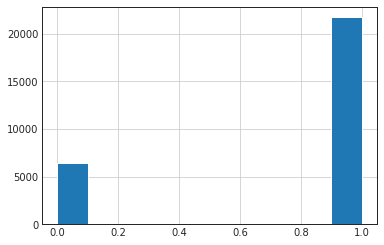

In [ ]:
listings['host_identity_verified'].hist()

***ДАТЫ***

***host_since*** - дата, когда хост впервые разместил объявление в сервисе

In [ ]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [ ]:
# считаем количество дней до 10.02.2021
listings['host_days_active'] = (datetime(2021, 2, 10) - listings['host_since']).astype('timedelta64[D]')

In [ ]:
listings['host_days_active'].isna().sum()

11

In [ ]:
# Заполним медианой
listings['host_days_active'].fillna(listings['host_days_active'].median(), inplace=True)

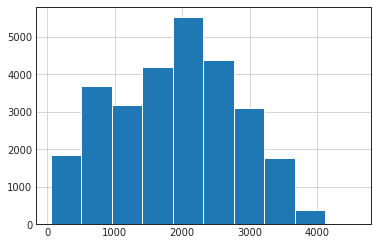

In [ ]:
# большая часть хостов активированы в сервисе довольно давно (более 2000 дней, т.е более 5 лет)
listings['host_days_active'].hist()

In [ ]:
#вытащим год из полной даты
listings['host_since'] = listings['host_since'].dt.year

In [ ]:
listings['host_since'].fillna(listings['host_since'].mode()[0], inplace=True)

In [ ]:
listings['host_since'].value_counts(normalize=True)

2015.0    0.160207
2014.0    0.144045
2016.0    0.128308
2019.0    0.106213
2013.0    0.102092
2018.0    0.098078
2017.0    0.090867
2012.0    0.073568
2011.0    0.044190
2020.0    0.038471
2010.0    0.012184
2008.0    0.001208
2009.0    0.000568
Name: host_since, dtype: float64

***first_review*** - дата размещения первого отзыва   
***last_review*** - дата последнего размещения отзыва

In [ ]:
# в данных множественные пропуски, это связано с тем, что некоторые объявления не имеют отзывов
# выведем пропуски в отдельную категорию
listings['first_review'].isna().sum()

6382

In [ ]:
listings['last_review'].isna().sum()

6382

In [ ]:
# подсчитаем дни, прошедшие с первого отзыва
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['time_since_first_review'] = (datetime(2021, 2, 10) - listings['first_review']).astype('timedelta64[D]')

In [ ]:
# и дни прошедшие с последнего
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['time_since_last_review'] = (datetime(2021, 2, 10) - listings['last_review']).astype('timedelta64[D]')

In [ ]:
def review_cat(col, bins, labels):
    listings[col] = pd.cut(listings[col], bins=bins, labels=labels, include_lowest=True)
    listings[col] = listings[col].astype('str')

In [ ]:
review_cat('time_since_first_review',
           bins=[0, 181, 365, 730, 1460, max(listings['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])

In [ ]:
review_cat('time_since_last_review',
           bins=[0, 181, 365, 730, 1460, max(listings['time_since_last_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])

In [ ]:
listings['time_since_first_review'] = listings['time_since_first_review'].replace('nan','no_reviews')

In [ ]:
listings['time_since_last_review'] = listings['time_since_last_review'].replace('nan','no_reviews')

In [ ]:
listings['time_since_first_review'].value_counts(normalize=True)

4+ years       0.303471
2-3 years      0.245924
no_reviews     0.226706
1-2 years      0.175020
6-12 months    0.026003
0-6 months     0.022877
Name: time_since_first_review, dtype: float64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

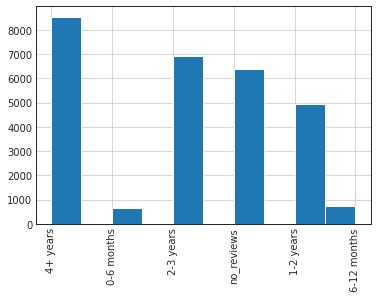

In [ ]:
# значительная часть недвижимости сдается уже давно, так как с момента первого отзыва у многих прошло уже несколько лет
listings['time_since_first_review'].hist()
plt.xticks(rotation=90)

In [ ]:
# активно сдаваемой недвижимости около 22%
listings['time_since_last_review'].value_counts(normalize=True)

1-2 years      0.273809
no_reviews     0.226706
0-6 months     0.220063
6-12 months    0.169159
2-3 years      0.081027
4+ years       0.029235
Name: time_since_last_review, dtype: float64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

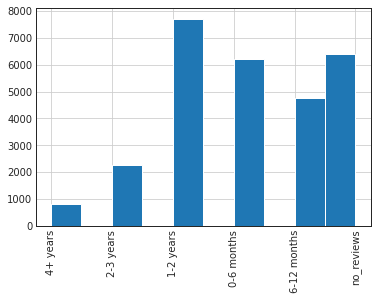

In [ ]:
listings['time_since_last_review'].hist()
plt.xticks(rotation=90)

In [ ]:
listings.drop(columns=['first_review', 'last_review'],  axis=1, inplace=True)

***КОЛИЧЕСТВЕННЫЕ ДАННЫЕ***

***id***- уникальный идентификатор предлагаемой недвижимости

In [ ]:
# данные не имеют повторов
listings['id'].value_counts().value_counts(normalize=True)

1    1.0
Name: id, dtype: float64

In [ ]:
# данные содержат информацию по 28151 объекту недвижимости
listings['id'].nunique()

28151

In [ ]:
# пропусков нет
listings['id'].isna().sum()

0

***host_id*** - идентификатор хоста (владельца недвижимости). Значение не уникальное, так как один хост может сдавать несколько объектов недвижимости

In [ ]:
listings['host_id'].nunique()

14817

In [ ]:
# 3 хоста предлагает более 100 объектов недвижимости из представленных в датасете
host_id = listings[['host_id', 'id']].groupby('host_id', as_index=False).count().sort_values('id', ascending=False).rename(columns={'id': 'total'})
host_id

host_id  total
4704    23532561    151
1614     5056483    121
9047    96122546    106
395      1107433     70
12243  224869116     60
...          ...    ...
6042    35623426      1
6043    35628033      1
6046    35692449      1
6047    35697802      1
14816  380396533      1

[14817 rows x 2 columns]

In [ ]:
# пропусков нет
listings['host_id'].isna().sum()

0

***host_acceptance_rate*** - на какую долю обращений гостей хост ответил согласием

In [ ]:
# множественные пропуски
listings['host_acceptance_rate'].isna().sum()

6394

In [ ]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str[:-1].astype('float64')

In [ ]:
# отсутствующие данные заменим на 0
listings['host_acceptance_rate'].fillna(0, inplace=True)

In [ ]:
# Проведем нормализацию данных
scaler = preprocessing.MinMaxScaler()

In [ ]:
listings[['host_acceptance_rate']] = scaler.fit_transform(listings[['host_acceptance_rate']])

In [ ]:
# нет данных по четверти хостов
# половина хостов принимает всех обратившихся к ним гостей
listings['host_acceptance_rate'].value_counts(normalize=True)

1.00    0.502789
0.00    0.261021
0.99    0.036979
0.98    0.023125
0.97    0.016802
          ...   
0.30    0.000036
0.16    0.000036
0.19    0.000036
0.32    0.000036
0.15    0.000036
Name: host_acceptance_rate, Length: 88, dtype: float64

***host_response_rate*** - частота отклика хоста

In [ ]:
# в данных много пропусков
listings['host_response_rate'].isna().sum()

11165

In [ ]:
listings['host_response_rate'] = listings['host_response_rate'].str[:-1].astype('float64')

In [ ]:
listings['host_response_rate'].fillna(0, inplace=True)

In [ ]:
listings[['host_response_rate']] = scaler.fit_transform(listings[['host_response_rate']])

In [ ]:
# нет данных по 42% хостов
# 45% хостов отвечают на все запросы
listings['host_response_rate'].value_counts(normalize=True)

1.00    0.451565
0.00    0.428120
0.90    0.019360
0.80    0.014848
0.50    0.012397
0.99    0.008312
0.75    0.006785
0.70    0.006181
0.67    0.006039
0.98    0.005719
0.83    0.003694
0.60    0.003339
0.91    0.003019
0.89    0.002700
0.95    0.002202
0.88    0.001812
0.92    0.001776
0.63    0.001705
0.93    0.001705
0.20    0.001670
0.56    0.001634
0.33    0.001634
0.86    0.001527
0.96    0.001456
0.94    0.001279
0.97    0.001208
0.40    0.001030
0.78    0.000853
0.71    0.000781
0.57    0.000675
0.25    0.000604
0.30    0.000426
0.68    0.000391
0.44    0.000320
0.17    0.000320
0.69    0.000284
0.85    0.000284
0.11    0.000249
0.79    0.000249
0.10    0.000213
0.82    0.000178
0.43    0.000178
0.87    0.000178
0.14    0.000142
0.38    0.000142
0.09    0.000107
0.29    0.000107
0.84    0.000107
0.54    0.000107
0.22    0.000071
0.62    0.000071
0.42    0.000036
0.64    0.000036
0.13    0.000036
0.46    0.000036
0.39    0.000036
0.81    0.000036
0.34    0.000036
Name: host_res

***host_listings_count*** - количество объектов недвижимости, предлагаемых хостом

In [ ]:
''' выявляем несколько моментов:
1. 2446 значений, указывают, что хост вообще не сдает недвижимость, что противоречит нашим данным, то есть фактически эти данные NAN
2. некоторые хосты сдают значительно больше объектов недвижимости, чем мы выявили при группировке host_id, но это можно объяснить тем, 
что не вся их недвижимость представлена в данном датасете, также возможно, что данные объекты недвижимости расположены в других городах или даже странах''' 
listings['host_listings_count'].value_counts()

1.0      7801
2.0      3841
3.0      3035
0.0      2446
4.0      2262
         ... 
168.0       1
143.0       1
52.0        1
228.0       1
240.0       1
Name: host_listings_count, Length: 90, dtype: int64

In [ ]:
# также есть 11 пропусков
listings['host_listings_count'].isna().sum()

11

In [ ]:
# все 0 переводим в NaN, пропуски заполним подсчитанным выше значением total при группировке по host_id
listings['host_listings_count'] = listings['host_listings_count'].replace(0, np.nan)

In [ ]:
# датафрейм в котором host_listings_count заполнены nan и есть столбец total(вычисляемое значение кол) с вычисленным значением listings
i = listings[listings.host_listings_count.isnull()].merge(host_id)

In [ ]:
# значения для заполнения nan
j = i.set_index('id')['total']

In [ ]:
# заполняем пропуски
listings['host_listings_count'] = listings['host_listings_count'].fillna(listings['id'].map(j))

In [ ]:
# проверим пропуски снова
listings['host_listings_count'].isna().sum()

0

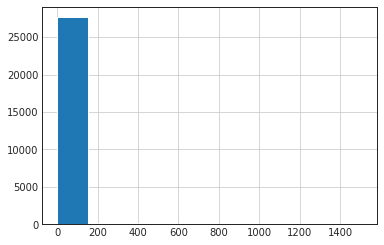

In [ ]:
# посмотрим как распределены значения признака 
listings['host_listings_count'].hist()

In [ ]:
# около 74% данных расположены в диапазоне от 1 до 5 объектов недвижимости на одного хоста
listings['host_listings_count'].value_counts(normalize=True).round(2)

1.0      0.33
2.0      0.15
3.0      0.12
4.0      0.08
5.0      0.06
         ... 
143.0    0.00
489.0    0.00
33.0     0.00
228.0    0.00
272.0    0.00
Name: host_listings_count, Length: 89, dtype: float64

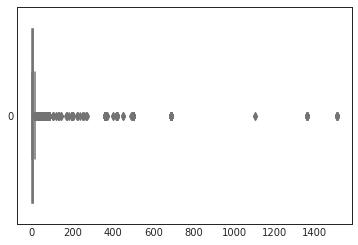

In [ ]:
# смотрим выбросы
sns.boxplot(data=listings['host_listings_count'], palette='cool', orient='h')

In [ ]:
# проверим, что стоит за таким большим количеством выбросов
listings_count = listings[['host_id', 'host_listings_count', 'id']].groupby(['host_id','host_listings_count'], as_index=False).count().\
sort_values('host_listings_count', ascending=False).rename(columns={'id': 'count_in_df'})

In [ ]:
''' проверила на сайте Airbnb хостов с наибольшим количеством предлагаемой недвижимости - все они являются представителями риэлторских компаний
по краткосрочной сдаче жилья по всей Италии, или по всему миру - то есть полученные данные вполне реальны'''

listings_count.head(10)

host_id  host_listings_count  count_in_df
4328    20933780               1507.0           13
13270  270230010               1361.0           14
13946  310835509               1103.0            2
1614     5056483                687.0          121
2668     9700636                502.0            7
11784  201739458                499.0           24
10599  151629651                489.0            1
11626  194247046                449.0            3
4293    20653285                421.0           13
12217  223814216                417.0            2

***latitude*** - данные о широте расположения объекта недвижимости

In [ ]:
# в данных отсутствуют пропуски
listings['latitude'].isna().sum()

0

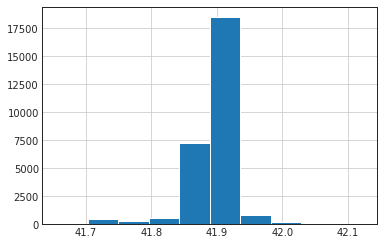

In [ ]:
# распределение значений признака
# большинство значений сконцентрировано около широты 41,9 (эта широта делит город примерно пополам)
listings['latitude'].hist()

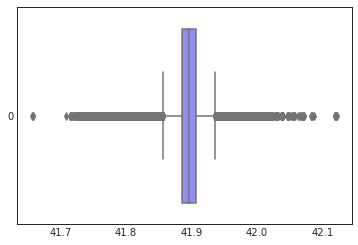

In [ ]:
# проверим выбросы
# проверим минимальное и максимальное значение выбросов на соответствие географической широте пригородов Рима
sns.boxplot(data=listings['latitude'], palette='cool', orient='h')

In [ ]:
min_lat = listings['latitude'].min()
min_lat

41.65701

In [ ]:
# минимальное значение широты соответствует пригородам Рима, южнее города Ачилия
listings['neighbourhood'][listings['latitude'] == min_lat]

12179    X Ostia/Acilia
Name: neighbourhood, dtype: object

In [ ]:
max_lat = listings['latitude'].max()
max_lat

42.12174

In [ ]:
# максимальное значение широты соответствует северным пригородам Рима, расположенным вдоль Кассиевой дороги
listings['neighbourhood'][listings['latitude'] == max_lat]

26851    XV Cassia/Flaminia
Name: neighbourhood, dtype: object

***longitude*** - данные о долготе расположения объекта недвижимости

In [ ]:
# в данных отсутствуют пропуски
listings['longitude'].isna().sum()

0

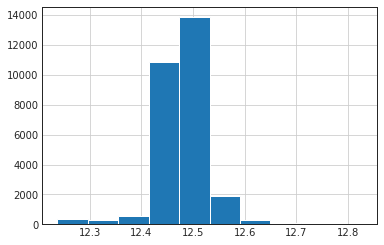

In [ ]:
# распределение значений признака - проверим соответствует ли разброс долготы географической долготе Рима и ближайших пригородов
# большая часть значений соответствует долготе 12,5 (эта долгота также делит город пополам, что совместно с данными о широте позволяет сделать вывод,
# что большая часть предлагаемой недвижимости расположена в центре города)
listings['longitude'].hist()

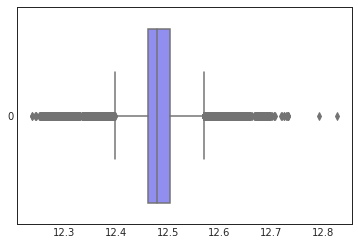

In [ ]:
# проверим выбросы
sns.boxplot(data=listings['longitude'], palette='cool', orient='h')

In [ ]:
min_long = listings['longitude'].min()
min_long

12.23773

In [ ]:
# минимальная долгота соответствует приморским пригородам Рима, расположенным возле аэропорта Фьюмичино
listings['neighbourhood'][listings['longitude'] == min_long]

26914    X Ostia/Acilia
Name: neighbourhood, dtype: object

In [ ]:
max_long = listings['longitude'].max()
max_long

12.826260000000001

In [ ]:
# максимальная долгота соответствует восточному пригороду Сан-Витторино
listings['neighbourhood'][listings['longitude'] == max_long]

20089    VI Roma delle Torri
Name: neighbourhood, dtype: object

***accommodates*** - сколько человек возможно разместить

In [ ]:
# пропусков в данных нет
listings['accommodates'].isna().sum()

0

In [ ]:
# в данных присутствует одно значение равное нулю, что противоречит логике данных 
listings['accommodates'].value_counts(normalize=True)

2     0.325353
4     0.248126
3     0.124862
6     0.090441
5     0.079358
1     0.049377
8     0.026678
7     0.022770
10    0.009200
9     0.009129
12    0.004192
11    0.003481
16    0.003055
14    0.001527
13    0.001456
15    0.000959
0     0.000036
Name: accommodates, dtype: float64

In [ ]:
listings[listings['accommodates'] == 0]

id  ... time_since_last_review
25767  43036135  ...             no_reviews

[1 rows x 37 columns]

In [ ]:
# заменим на значение моды
listings['accommodates'] = listings['accommodates'].replace(0, listings['accommodates'].mode()[0])

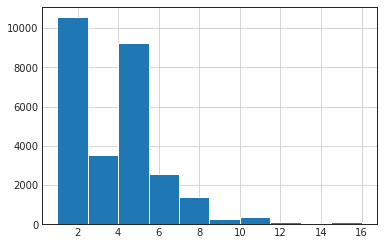

In [ ]:
# распределение значений признака
listings['accommodates'].hist()

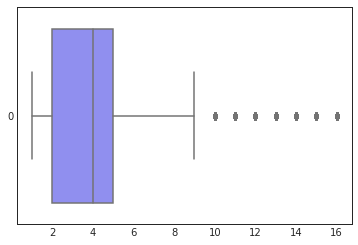

In [ ]:
# проверим выбросы 
sns.boxplot(data=listings['accommodates'], palette='cool', orient='h')

In [ ]:
# часть значений вполне реальны, среди видов недвижимости есть целые апартаменты и виллы способные вместить большое количество гостей
# также часть объявлений относится к мини-отелям и гостевым домам, которые указывали суммарное количество гостей
# такие значения вносят шум в остальные данных и дают выбросы по многим показателям
listings[['id', 'property_type']][listings['accommodates'] == listings['accommodates'].max()]

id property_type
1357    1136842         hotel
2038    1991417     apartment
2278    2325542     apartment
2414    2531491         house
2608    2762941     apartment
...         ...           ...
26144  43694170     apartment
26337  43936423     apartment
26604  44264976     apartment
26772  44486957     apartment
27060  45114184         hotel

[86 rows x 2 columns]

***bedrooms*** - количество спален

In [ ]:
# данные содержат пропуски
listings['bedrooms'].isna().sum()

898

In [ ]:
# заполним медианным значением (медиана значений признака в данной случае равна моде)
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)

In [ ]:
# после заполнения пропусков, существенных искажений не получили
listings['bedrooms'].describe()

count    28151.000000
mean         1.475649
std          0.881929
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: bedrooms, dtype: float64

In [ ]:
# большая часть объявлений предлагает гостям одну или две спальные комнаты
listings['bedrooms'].value_counts(normalize=True)

1.0     0.679479
2.0     0.217967
3.0     0.072111
4.0     0.019573
5.0     0.006394
6.0     0.002451
8.0     0.000568
7.0     0.000462
10.0    0.000320
9.0     0.000284
11.0    0.000107
12.0    0.000107
14.0    0.000071
15.0    0.000036
24.0    0.000036
16.0    0.000036
Name: bedrooms, dtype: float64

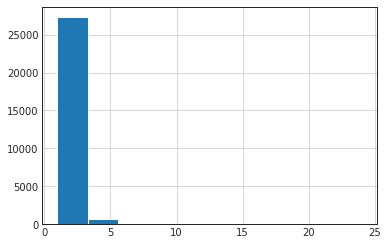

In [ ]:
listings['bedrooms'].hist()

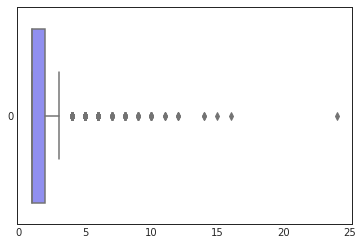

In [ ]:
# проверим выбросы 
# в данных также есть выбросы, на которые стоит в дальнейшем обратить внимание
sns.boxplot(data=listings['bedrooms'], palette='cool', orient='h')

***beds*** - количество спальных мест

In [ ]:
# есть некоторое количество пропусков
listings['beds'].isna().sum()

202

In [ ]:
# есть также данные, содержащие ноль кроватей
listings['beds'].value_counts(normalize=True)

1.0     0.367813
2.0     0.292390
3.0     0.148091
4.0     0.083473
5.0     0.034169
0.0     0.029554
6.0     0.021468
7.0     0.008587
8.0     0.005295
9.0     0.002827
10.0    0.002540
12.0    0.000859
11.0    0.000823
16.0    0.000572
14.0    0.000501
15.0    0.000286
13.0    0.000215
18.0    0.000143
19.0    0.000143
24.0    0.000107
20.0    0.000107
22.0    0.000036
Name: beds, dtype: float64

In [ ]:
# заменим нули на NaN
listings['beds'] = listings['beds'].replace(0, np.nan)

In [ ]:
# заполним медианой показателя
listings['beds'].fillna(listings['beds'].median(), inplace=True)

In [ ]:
# после заполнения пропусков, существенных искажений не получили
listings['beds'].describe()

count    28151.000000
mean         2.294128
std          1.640416
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: beds, dtype: float64

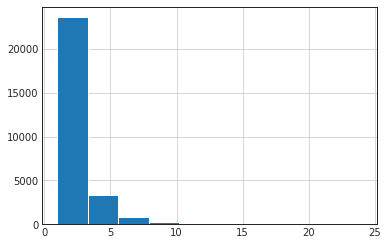

In [ ]:
listings['beds'].hist()

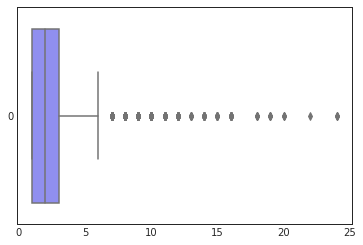

In [ ]:
sns.boxplot(data=listings['beds'], palette='cool', orient='h')

In [ ]:
# допустим несколько проверок на качество данных
to_drop_1 = listings.query('(accommodates < 10) and (bedrooms > 5 or bathrooms > 6) and (property_type != "house")')

In [ ]:
listings = pd.concat([listings, to_drop_1]).drop_duplicates(keep=False)

In [ ]:
to_drop_2 = listings.query('(accommodates > 12) and (beds < 4)')

In [ ]:
listings = pd.concat([listings, to_drop_2]).drop_duplicates(keep=False)

In [ ]:
to_drop_3 = listings.query('(accommodates < 10) and (beds > 10)')

In [ ]:
listings = pd.concat([listings, to_drop_3]).drop_duplicates(keep=False)

In [ ]:
# теперь значения показателей 'accommodates', 'bathrooms', 'beds', 'bedrooms' хоть и содержат выбросы, но они относятся к реально существующим 
# крупным объектам недвижимости с возможностью бронирования на более 10 гостей
outliers = listings[['accommodates', 'bathrooms', 'beds', 'bedrooms']]

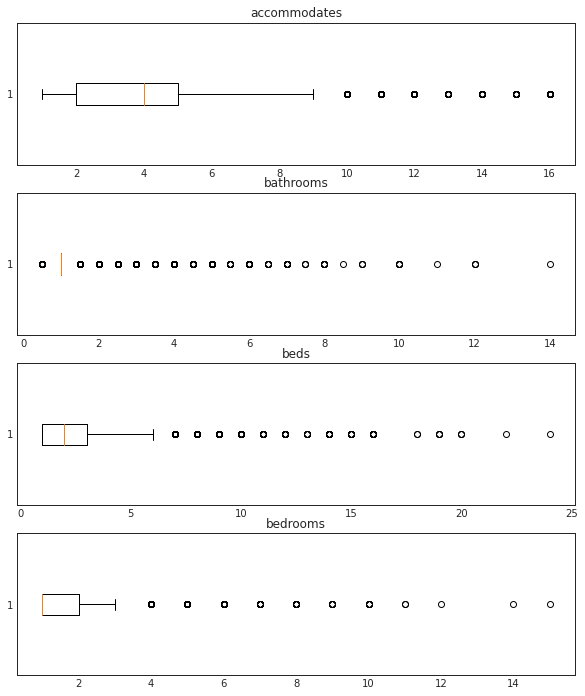

In [ ]:
fig, axes = plt.subplots(4, figsize=(10, 12))
i=0
for column in outliers.iloc[: , :4].columns:
    axes[i].boxplot(outliers[column], vert=False)
    axes[i].set_title(column)
    i+=1

***minimum_nights*** - минимальное количество ночей для бронирования    и  ***maximum_nights*** - максимальное количество ночей для бронирования

In [ ]:
# пропусков нет
listings['minimum_nights'].isna().sum()

0

In [ ]:
# пропусков нет
listings['maximum_nights'].isna().sum()

0

In [ ]:
# проверка на качество данных: минимальное кол-во ночей не больше максимального
listings.query('maximum_nights < minimum_nights')

Empty DataFrame
Columns: [id, description, host_id, host_since, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_verifications, host_identity_verified, neighbourhood, latitude, longitude, property_type, room_type, accommodates, bedrooms, beds, amenities, minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, price_euro, bathrooms, bathrooms_private, amenities_count, host_days_active, time_since_first_review, time_since_last_review]
Index: []

In [ ]:
# проверка на качество данных: минимальное кол-во ночей равно максимальному
nights_max_min = listings.query('maximum_nights == minimum_nights')

In [ ]:
# есть относительно небольшое количество объявлений, где максимальное и минимальное количество ночей имеет нулевой разброс,
# то есть жилье сдается на строго определенное количество дней
nights_max_min[['maximum_nights' , 'minimum_nights']].value_counts()

maximum_nights  minimum_nights
30              30                19
1               1                 18
28              28                17
3               3                  7
2               2                  5
365             365                4
29              29                 4
90              90                 3
20              20                 2
180             180                2
200             200                1
31              31                 1
364             364                1
25              25                 1
120             120                1
40              40                 1
15              15                 1
10              10                 1
7               7                  1
6               6                  1
5               5                  1
4               4                  1
60              60                 1
100             100                1
21              21                 1
dtype: int64

In [ ]:
listings['minimum_nights'].unique()

array([   7,    1,    3,    2,   28,    4,    6,    5,   30,  300,   14,
         84,   10,  350,   31,   90,  120,   21,   35,   15,   20,    9,
         25,   60,   29,   12,  180,   50,   40,   27,  365,   45,  150,
        100,  200,   16,  364,   13,  720,    8,   92, 1000,   23,   18,
         55,  360,  118,  153,   56,  110,   11,   75,   19,   32])

In [ ]:
# попробуем систематизировать разрозненные числовые значения на категории:
listings['minimum_nights_cat'] = pd.cut(listings['minimum_nights'], bins=[0, 8, 15, 22, 32, 61, 181, 366, listings['minimum_nights'].max()], 
                                    labels=['1-7', '8-14', '15-21', '22-31', '32-60', '61-180', '181-365', '366+'], include_lowest=True)

In [ ]:
# большая часть предложений допускает минимальное количество ночей (1-7)
# предложения с минимальным количеством ночей больше 366 дней относится скорее всего к временно "замороженным" объявлениям
listings['minimum_nights_cat'].value_counts(normalize=True)

1-7        0.968102
22-31      0.015007
8-14       0.008677
61-180     0.003414
15-21      0.002134
32-60      0.001707
181-365    0.000853
366+       0.000107
Name: minimum_nights_cat, dtype: float64

In [ ]:
listings['maximum_nights_cat'] = pd.cut(listings['maximum_nights'], bins=[0, 8, 15, 22, 32, 61, 181, 366, listings['maximum_nights'].max()], 
                                    labels=['1-7', '8-14', '15-21', '22-31', '32-60', '61-180', '181-365', '366+'], include_lowest=True)

In [ ]:
# здесь, в свою очередь можно увидеть, что больше половины объявлений допускают бронирование недвижимости на срок больше года
listings['maximum_nights_cat'].value_counts(normalize=True)

366+       0.530671
22-31      0.224921
61-180     0.067707
181-365    0.055510
8-14       0.045909
32-60      0.031116
1-7        0.028093
15-21      0.016073
Name: maximum_nights_cat, dtype: float64

***availability_365*** - количество ночей доступных для бронирования в следующие 365 дней

In [ ]:
# пропусков нет
listings['availability_365'].isna().sum()

0

In [ ]:
listings['availability_365_cat'] = pd.cut(listings['availability_365'], bins=[0, 1, 15, 31, 61, 121, 181, 241, 301, 364, 365], 
                                    labels=['0','1-14', '15-30', '31-60', '61-120','121-180', '181-240', '241-300', '301-364', '365'], include_lowest=True)

In [ ]:
# значения равные нулю, скорее всего указывают на то, что недвижимость временно не сдается или сдана долгосрочно
# 16% недвижимости не имеет никакой брони на ближайшие 365 дней
listings['availability_365_cat'].value_counts(normalize=True).round(2)

301-364    0.34
365        0.16
0          0.13
121-180    0.11
61-120     0.09
241-300    0.08
181-240    0.04
31-60      0.02
1-14       0.01
15-30      0.01
Name: availability_365_cat, dtype: float64

In [ ]:
listings.drop(columns=['availability_365', 'minimum_nights', 'maximum_nights'], axis=1, inplace=True)

***number_of_reviews*** - количество отзывов

In [ ]:
# пропусков нет
listings['number_of_reviews'].isna().sum()

0

In [ ]:
# 23% объявлений не имеют отзывов
listings['number_of_reviews'].value_counts(normalize=True).round(2)

0      0.23
1      0.08
2      0.05
3      0.04
4      0.03
       ... 
501    0.00
485    0.00
437    0.00
421    0.00
407    0.00
Name: number_of_reviews, Length: 468, dtype: float64

***price_euro*** - цена в евро за ночь пребывания

In [ ]:
# пропусков нет
listings['price_euro'].isna().sum()

0

In [ ]:
# есть предложения с нулевой ценой
listings.loc[listings['price_euro'] == 0]

id  ... availability_365_cat
25406  42384420  ...                    0
25441  42430406  ...                    0
25442  42431307  ...                    0
25443  42431320  ...                    0
25525  42534857  ...                    0
25767  43036135  ...                    0

[6 rows x 37 columns]

In [ ]:
# заменим нули на NaN
listings['price_euro'] = listings['price_euro'].replace(0, np.nan)

In [ ]:
# заполним медианой показателя
listings['price_euro'].fillna(listings['price_euro'].median(), inplace=True)

In [ ]:
listings['price_euro'].value_counts()

42.0      1245
66.0      1009
50.0       931
58.0       834
37.0       833
          ... 
607.0        1
451.0        1
380.0        1
8299.0       1
259.0        1
Name: price_euro, Length: 568, dtype: int64

In [ ]:
listings['price_euro'].describe()

count    28121.000000
mean        90.068988
std        267.178402
min          7.000000
25%         40.000000
50%         58.000000
75%         86.000000
max       8774.000000
Name: price_euro, dtype: float64

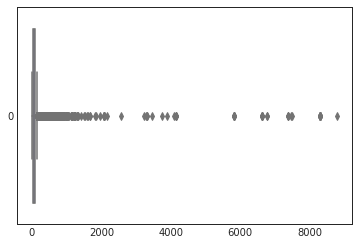

In [ ]:
sns.boxplot(data=listings['price_euro'], palette='cool', orient='h')

In [ ]:
# все объявления по этому запросу оказались обычными комнатами в апартаментах и отеле
# цена выглядит умышленно завышенной, видимо эти объявления также временно 'заморожены'
# есть объявления, где цена указана не за ночь, а за минимальный период аренды

to_drop_4 = listings.query('price_euro > 500 and (bathrooms_private == 0 or room_type == "shared")')


In [ ]:
listings = pd.concat([listings, to_drop_4]).drop_duplicates(keep=False)

In [ ]:
to_drop_5 = listings.query('price_euro > 1000 and room_type == "Private room" and (property_type == "guesthouse" or property_type == "apartment")')

In [ ]:
listings = pd.concat([listings, to_drop_5]).drop_duplicates(keep=False)

In [ ]:
to_drop_6 = listings.query('price_euro > 2000 and room_type != "Entire home/apt"')

In [ ]:
listings = pd.concat([listings, to_drop_6]).drop_duplicates(keep=False)

In [ ]:
to_drop_7 = listings.query('price_euro > 4000')

In [ ]:
listings = pd.concat([listings, to_drop_7]).drop_duplicates(keep=False)

In [ ]:
to_drop_8 = listings.query('price_euro <= 50 and (accommodates >= 10 or beds >= 10 or bathrooms >= 10 or bedrooms >= 10)')


In [ ]:
listings = pd.concat([listings, to_drop_8]).drop_duplicates(keep=False)

In [ ]:
listings.loc[listings['price_euro'] == listings['price_euro'].max()]

id  ... availability_365_cat
17802  29448460  ...              301-364

[1 rows x 37 columns]

* ***review_scores_rating*** - общее впечатление гостей
* ***review_scores_accuracy*** - оценка недвижимости по соответствию описанию
* ***review_scores_checkin*** - оценка прибытия гостя
* ***review_scores_communication*** - оценка общения с хостом
* ***review_scores_location*** - оценка местоположения недвижимости
* ***review_scores_value*** - оценка соотношения цена/качество
* ***review_scores_cleanliness*** - оценка чистоты недвижимости

In [ ]:
review_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
          'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [ ]:
listings[review_cols].isna().sum()

review_scores_rating           6646
review_scores_accuracy         6716
review_scores_cleanliness      6713
review_scores_checkin          6722
review_scores_communication    6714
review_scores_location         6725
review_scores_value            6726
dtype: int64

In [ ]:
# заполним пропуски нулями
listings['review_scores_rating'].fillna(0, inplace=True)
listings['review_scores_accuracy'].fillna(0, inplace=True)
listings['review_scores_checkin'].fillna(0, inplace=True)
listings['review_scores_communication'].fillna(0, inplace=True)
listings['review_scores_location'].fillna(0, inplace=True)
listings['review_scores_value'].fillna(0, inplace=True)
listings['review_scores_cleanliness'].fillna(0, inplace=True)

In [ ]:
# нормализуем данные по рейтингам
listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 
          'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_cleanliness']] = \
          scaler.fit_transform(listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 
          'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_cleanliness']])

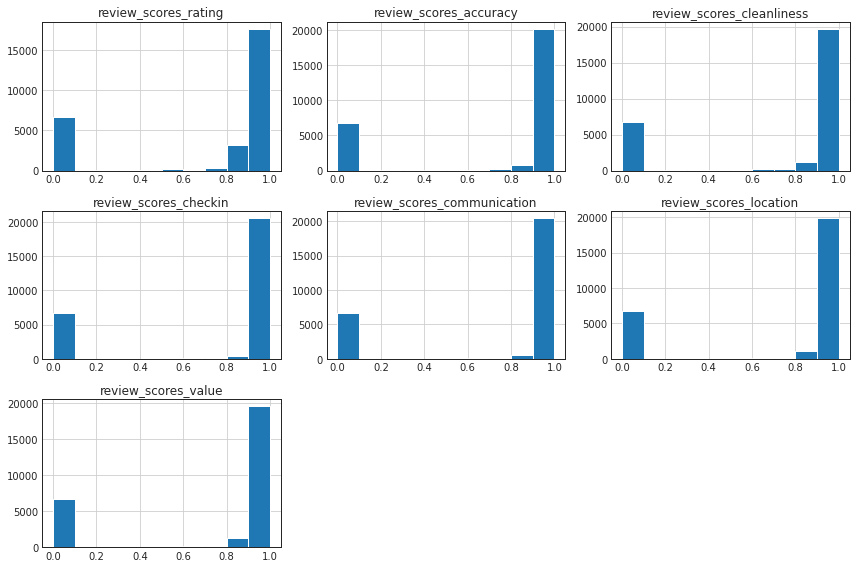

In [ ]:
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(review_cols):
    ax = fig.add_subplot(3,3,i+1)
    listings[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
# После всех преобразований получили такой датасет
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28053 entries, 0 to 28150
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           28053 non-null  int64   
 1   description                  28053 non-null  object  
 2   host_id                      28053 non-null  int64   
 3   host_since                   28053 non-null  float64 
 4   host_response_rate           28053 non-null  float64 
 5   host_acceptance_rate         28053 non-null  float64 
 6   host_is_superhost            28053 non-null  float64 
 7   host_listings_count          28053 non-null  float64 
 8   host_verifications           28053 non-null  object  
 9   host_identity_verified       28053 non-null  float64 
 10  neighbourhood                28053 non-null  object  
 11  latitude                     28053 non-null  float64 
 12  longitude                    28053 non-null  float64 
 13  p

In [ ]:
# Основные статистические данные, включая моду
df_describe = listings.describe()
metrics = {}
for column in listings:
    metrics[column] = listings[column].mode()[0]
df_describe = pd.concat([pd.DataFrame([metrics], index = ['mode']), df_describe])
df_describe = df_describe.drop(index=['count'])
df_describe.rename(index={'50%':'median'}, inplace=True)
df_describe.round(2)

id description  ...  maximum_nights_cat  availability_365_cat
mode        2737.00  heart rome  ...                366+               301-364
mean    22584907.95         NaN  ...                 NaN                   NaN
std     14283595.98         NaN  ...                 NaN                   NaN
min         2737.00         NaN  ...                 NaN                   NaN
25%      9658694.00         NaN  ...                 NaN                   NaN
median  22095813.00         NaN  ...                 NaN                   NaN
75%     35363176.00         NaN  ...                 NaN                   NaN
max     47080490.00         NaN  ...                 NaN                   NaN

[8 rows x 37 columns]

***Теперь посмотрим, какие взаимосвязи можно найти между полученными после обработки данными***

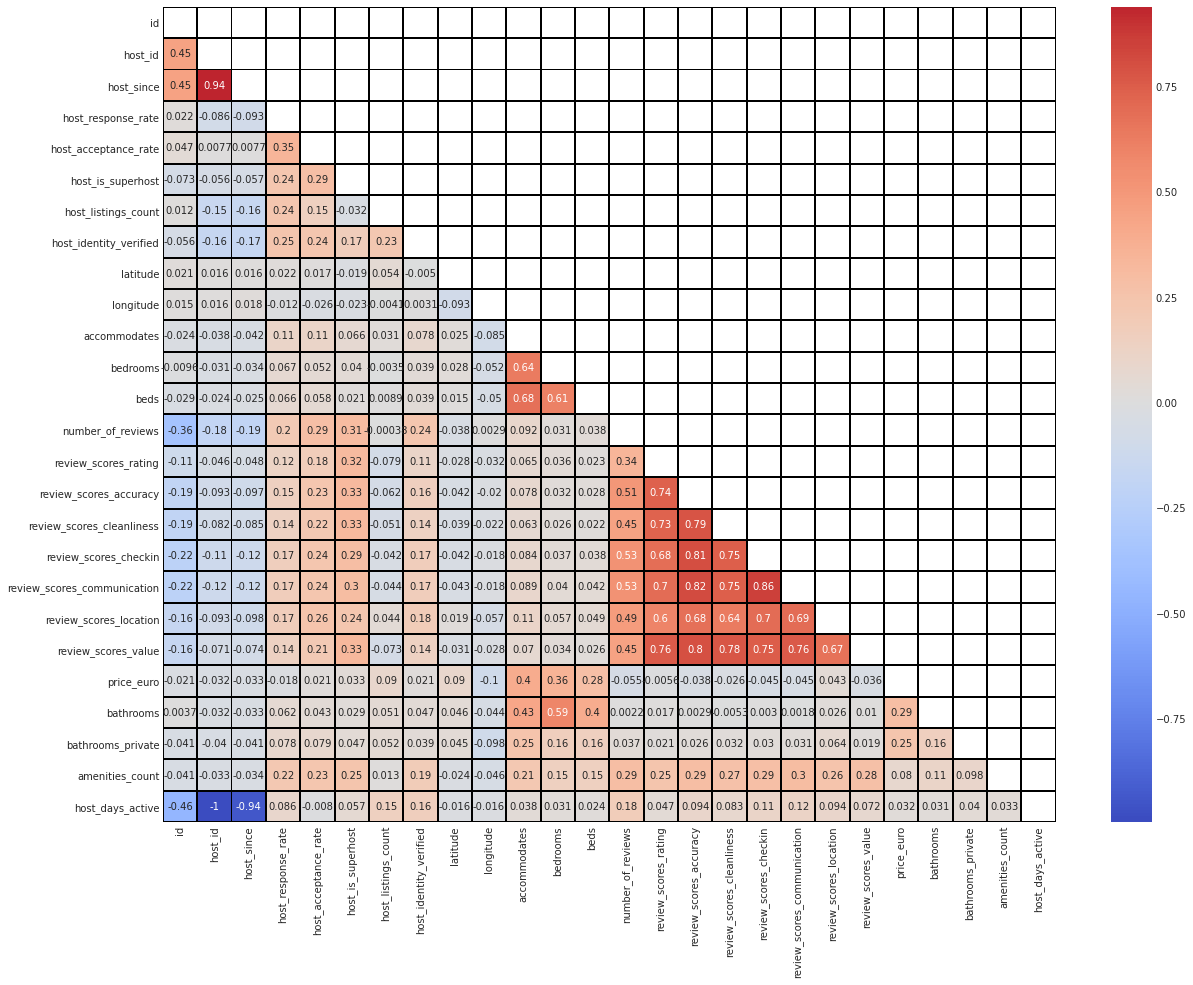

In [ ]:
plt.figure(figsize=(20, 15))
matrix = np.triu(listings.corr(method='kendall'))
sns.heatmap(listings.corr(method='kendall'), cmap='coolwarm', mask=matrix, center=0, linecolor='black', annot=True, linewidths=1)

***Прослеживается ряд взаимосвязей между переменными***
* Отрицательная направленность корреляционной связи - 'host_days_active' и 'id', 'host_days_active' и 'host_id', 'host_days_active' и 'host_since', 'id' и 'number_of_reviews'. Связь между всеми этими критериями основана на давности активации - пример возможной интерпретации: чем больше прошло дней с момента активации, тем меньшим числом будет обозначен id пользователя, но можно обозначить и наоборот: чем большим числом будет обозначен id пользователя, тем меньше дней прошло с его активации в сервисе.

* Положительная направленность корреляционной связи - можно разделить на подблоки:

  * связи также построенные на времени активации: 'id' - 'host_id', 'id' - 'host_since', 'host_since' - 'host_id'
  * подблок оценок недвижимости на основании отзывов: 'review_scores_rating', review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
'review_scores_communication', 'review_scores_location' - имеют достаточно высокую корреляцию между собой (мультиколлинеарны), эти критерии в дальнейшем рассмотрим подробнее, а также их взаимосвязь с 'number_of_reviews'
  * взаимосвязи ценообразования: 'price_euro' - 'accommodates', 'price_euro' -'bedrooms', 'price_euro' - 'beds', 'price_euro' - 'bathrooms', 'price_euro' - 'bathrooms_private'
  * взаимосвязи с категорией superhost: здесь все показатели оценок на основании отзывов ('review_scores_rating', review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
'review_scores_communication', 'review_scores_location'), а также 'superhost' -'number_of_reviews', 'superhost' - 'host_response_rate', 'superhost' - 'host_acceptance_rate', также рассмотрим подробнее
  * взаимосвязи, определяющие облик предлагаемой недвижимости: 'accommodates'- 'bathrooms', 'accommodates'- 'bedrooms', 'accommodates'- 'beds', 'bathrooms' - 'bedrooms', 'bathrooms' - 'beds', 'bathrooms' - 'beds', 'bedrooms' - 'beds' 


#ПРОВЕДЕМ ИССЛЕДОВАНИЕ ПОЛУЧЕННЫХ ДАННЫХ

***ОБ ОТЗЫВАХ И ОЦЕНКАХ недвижимости пользователями***

***Что нам уже известно:***

* 23% объявлений не имеют отзывов - то есть эту недвижимость  или ещё никто ни разу не снимал, или никто из снимающих жильё не стал оставлять отзыв


Конечно, не каждая сдача недвижимости на Airbnb равна полученному отзыву, но сделаем допущение, что отзывы после сдачи жилья все-таки чаще оставляют - этому способствует в том числе система автоматических напоминаний от сервиса, что в течение 14 дней после отъезда есть возможность оставить отзыв, а также двусторонняя система отзывов (хост также оценивает гостя и отзыв можно увидеть только после того, как оставишь свой или прошло 14 дней) https://www.airbnb.ru/help/article/13/как-устроена-система-отзывов-на-жилье.


Рассмотрим подробнее, ***сколько времени прошло с момента первого и с момента последнего отзыва*** для опубликованных объявлений:

In [ ]:
first_r = listings.sort_values(by='time_since_first_review', ascending=True)
last_r = listings.sort_values(by='time_since_last_review', ascending=True)

[None, None, None, None, None, None, None, None, None, None, None, None]

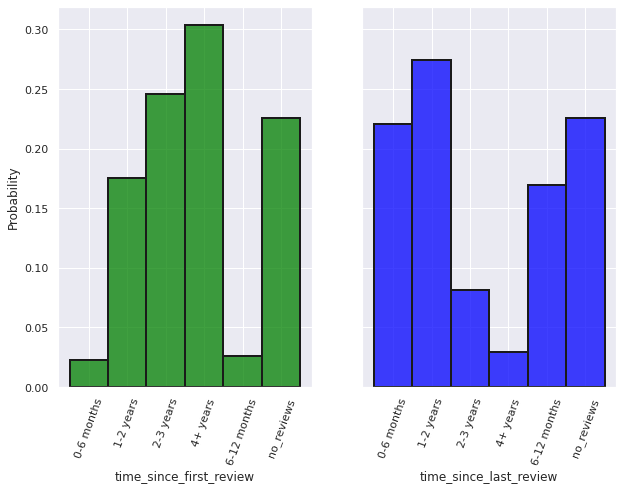

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
fig.suptitle('Сколько прошло времени с момента первого отзыва / с момента последнего отзыва',  fontsize=16, fontweight="bold")

fig, axes = plt.subplots(1,2, sharey=True)

sns.histplot(ax=axes[0], x = 'time_since_first_review', data = first_r, stat='probability' , color='Green', edgecolor="k", linewidth=2, )
sns.histplot(ax=axes[1], x = 'time_since_last_review', data = last_r, stat='probability', color='Blue', edgecolor="k", linewidth=2)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=70)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=70)

* ***от 0 до 6 месяцев*** :
    * первый отзыв - у 2% объявлений 
    * последний отзыв - 22% объявлений
* ***6-12 месяцев*** -
    * первый отзыв - 2%
    * последний отзыв - 17%
* ***1-2 года*** -
    * первый отзыв - 18%
    * последний отзыв - 27%
* ***2-3 года*** -
    * первый отзыв - 25%
    * последний отзыв - 8%
* ***более 4 лет*** -
    * первый отзыв - 30% 
    * последний отзыв - 3%

***ВЫВОД:***  На сервисе Airbnb представлено достаточно большое количество недвижимости в Риме, которая сдается в аренду уже давно (точно более 4 лет - 30% объявлений и более 2-3 лет еще 25%), за последний же год есть всего 4% объявлений, получивших свой первый отзыв (по 2% за каждые полгода) - сказывается в том числе падение спроса, связанное с существенным сокращением туристического потока из-за карантинных мер. Из всей недвижимости более активно сдается 22% недвижимости (есть отзывы за последние полгода) и есть 3% объявлений, отзывов по которым нет более 4 лет.

Интересно, а ***действительно ли большое количество отзывов может являться показателем качества жилья***? Попробуем проверить:

* на airbnb оценка качества жилья происходит через отзывы, поэтому убираем все объявления без отзывов
* мнение одного гостя может быть очень субъективным, поэтому предположим, что объявлению для анализа дали оценку хотя бы более 10 гостей

In [ ]:

review = listings[listings['number_of_reviews'] > 10]

In [ ]:
review['number_of_reviews'].mean()

82.92615704628186

In [ ]:
review = review[['id', 'number_of_reviews', 'review_scores_rating']]

In [ ]:
review['number_of_reviews'] = pd.cut(review['number_of_reviews'], bins=[review['number_of_reviews'].min(), 84, review['number_of_reviews'].max()], 
                                    labels=['less', 'more'], include_lowest=True)

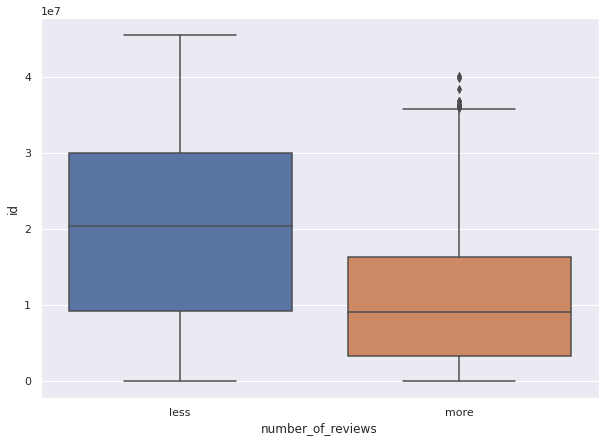

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.boxplot(x='number_of_reviews', y='id', data=review, palette='deep')
plt.show()

In [ ]:
#сделаем выборку по 3000 оцененных объявлений с количеством отзывов больше и меньше среднего 
more_reviewed = review.query('number_of_reviews == "more" and review_scores_rating != 0').head(3000)

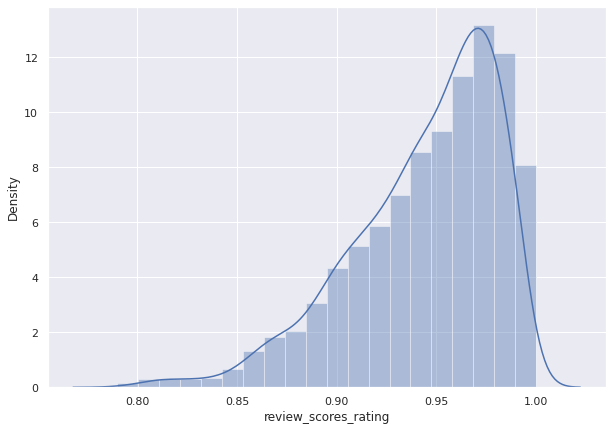

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(more_reviewed['review_scores_rating'], kde_kws={"label": 'review_scores_rating'}, bins=20)

In [ ]:
# выборка не имеет нормального распределения
result = stats.normaltest(more_reviewed['review_scores_rating'])
alpha = 0.5
print(result)

if result.pvalue < alpha:  # H0 - распределение нормально
    print("H0 может быть отклонена")
else:
    print("H0 не может быть отклонена")

NormaltestResult(statistic=382.94975059058515, pvalue=6.974582827262393e-84)
H0 может быть отклонена


In [ ]:
less_reviewed = review.query('number_of_reviews == "less" and review_scores_rating != 0').head(3000)

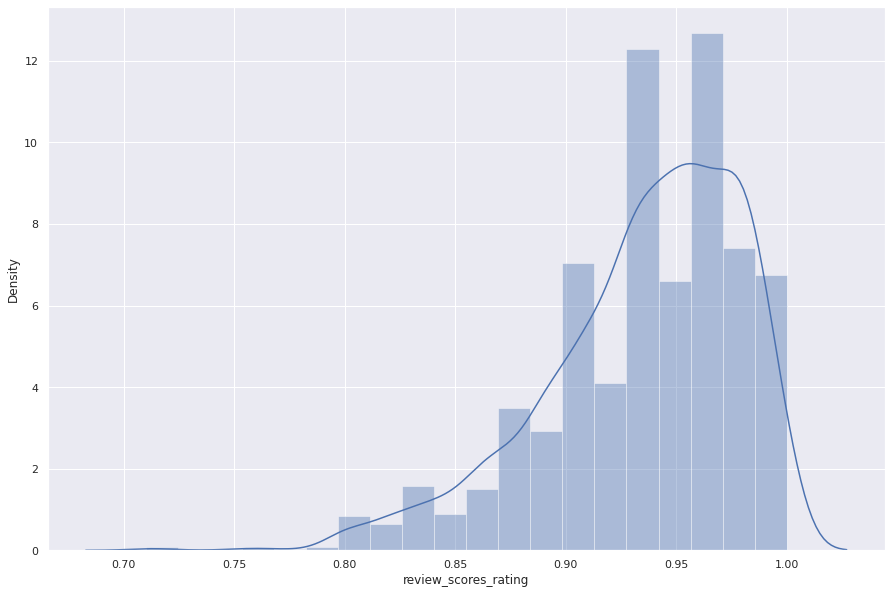

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(less_reviewed['review_scores_rating'], kde_kws={"label": 'review_scores_rating'}, bins=20)

In [ ]:
# выборка не имеет нормального распределения
result = stats.normaltest(less_reviewed['review_scores_rating'])
alpha = 0.05
print(result)

if result.pvalue < alpha:  # H0 - распределение нормально
    print("H0 может быть отклонена")
else:
    print("H0 не может быть отклонена")

NormaltestResult(statistic=399.0663015211885, pvalue=2.2072608885857287e-87)
H0 может быть отклонена


In [ ]:
# Использование в дальнейшем Т-теста без поправки Уэлча подразумевало бы равенство дисперсий
# проверим равенство дисперсий, тест Флигнера-Килина
# принимаем, что дисперсии различны
stats.fligner((less_reviewed['review_scores_rating']), (more_reviewed['review_scores_rating']))

FlignerResult(statistic=94.01006092892145, pvalue=3.139241545164243e-22)

In [ ]:
print(np.var(less_reviewed['review_scores_rating']), np.var(more_reviewed['review_scores_rating']))

0.0020051863888888967 0.00134379182222223


Оценим выборки с помощью 2 критериев: 
* Т-критерий с использованием поправки Уэлча (использование допустимо, так как выборка содержит большое количество наблюдений)
* непараметрический U-критерий Манна — Уитни

***Сформулируем гипотезы***

* H0 - Общая оценка рейтинга недвижимости одинакова для объявлений с количеством отзывов ниже среднего и с количеством отзывов выше среднего
* H1 - Общая оценка рейтинга недвижимости различна для объявлений с количеством отзывов ниже среднего и с количеством отзывов выше среднего

In [ ]:
# Т-тест с использованием поправки Уэлча для неравных отклонений в случае двух выборок
alpha = 0.05

result = stats.ttest_ind(more_reviewed['review_scores_rating'], less_reviewed['review_scores_rating'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Принимаем H1 - Общая оценка рейтинга недвижимости различна для объявлений с количеством отзывов ниже среднего \
и с количеством отзывов выше среднего')
else:
    print('Не отвергаем H0 - Общая оценка рейтинга недвижимости одинакова для объявлений с количеством отзывов ниже среднего \
и с количеством отзывов выше среднего')

Ttest_indResult(statistic=8.071999067557288, pvalue=8.346494995833528e-16)
Принимаем H1 - Общая оценка рейтинга недвижимости различна для объявлений с количеством отзывов ниже среднего и с количеством отзывов выше среднего


In [ ]:
# непараметрический U-критерий Манна — Уитни
alpha = 0.05

result = stats.mannwhitneyu(more_reviewed['review_scores_rating'], less_reviewed['review_scores_rating'])
print(result)

if (result.pvalue < alpha):
    print('Принимаем H1 - Общая оценка рейтинга недвижимости различна для объявлений с количеством отзывов ниже среднего \
и с количеством отзывов выше среднего')
else:
    print('Не отвергаем H0 - Общая оценка рейтинга недвижимости одинакова для объявлений с количеством отзывов ниже среднего \
и с количеством отзывов выше среднего')

MannwhitneyuResult(statistic=4066724.5, pvalue=4.5128238557489063e-11)
Принимаем H1 - Общая оценка рейтинга недвижимости различна для объявлений с количеством отзывов ниже среднего и с количеством отзывов выше среднего


(array([  5.,   9.,  18.,  11.,  21., 100.,  65., 233., 162., 185., 489.,
        293., 772., 383., 254.]),
 array([0.79 , 0.804, 0.818, 0.832, 0.846, 0.86 , 0.874, 0.888, 0.902,
        0.916, 0.93 , 0.944, 0.958, 0.972, 0.986, 1.   ]),
 <a list of 15 Patch objects>)

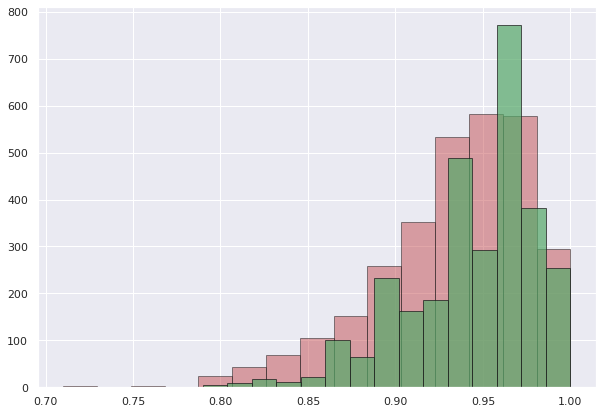

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
plt.hist(less_reviewed['review_scores_rating'], bins=15, color='r', edgecolor='k', alpha=0.5)
plt.hist(more_reviewed['review_scores_rating'], bins=15, color='g', edgecolor='k', alpha=0.7)

***ВЫВОД:*** при поиске жилья можно также ориентироваться на большое количество отзывов у объявления

Но как же ***формируется сама общая пользовательская оценка*** предлагаемого жилья? Какие из других имеющихся критериев оценки имеют большую с ней взаимосвязь?

In [ ]:
# посмотрим отдельно корреляцию общей оценки и других оценочных критериев
review_corr = listings[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [ ]:
# учтём, что отсутствующая часть данных была обозначена 0
review_corr = review_corr.query('review_scores_rating > 0 and review_scores_accuracy > 0 and \
       review_scores_cleanliness > 0 and review_scores_checkin > 0 and \
       review_scores_communication > 0 and review_scores_location  > 0 and \
       review_scores_value > 0')

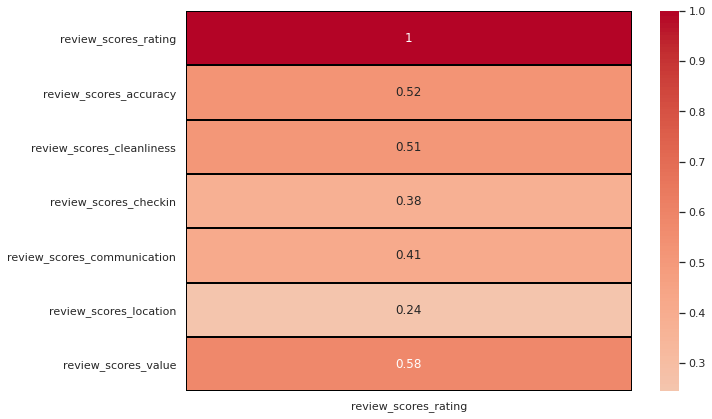

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(review_corr.corr(method='kendall')[['review_scores_rating']], cmap='coolwarm', center=0, linecolor='black', annot=True, linewidths=1)

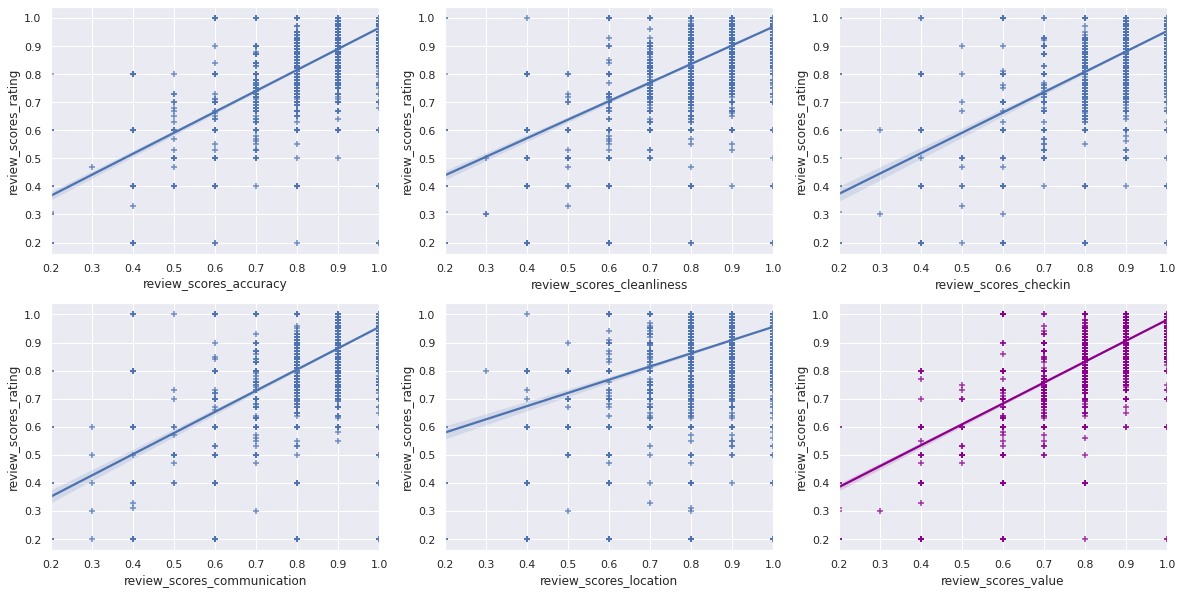

In [ ]:
# ВЗАИМОСВЯЗЬ СУММАРНОЙ ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ И ПРОЧИХ КРИТЕРИЕВ ОЦЕНКИ
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2,3)
sns.regplot(ax=axes[0,0], y = "review_scores_rating", x = "review_scores_accuracy", data = review_corr, marker='+')
sns.regplot(ax=axes[0,1],  y = "review_scores_rating", x = "review_scores_cleanliness", data = review_corr, marker='+')
sns.regplot(ax=axes[0,2],  y = "review_scores_rating", x = "review_scores_checkin", data = review_corr, marker='+')
sns.regplot(ax=axes[1,0],  y = "review_scores_rating", x = "review_scores_communication", data = review_corr, marker='+')
sns.regplot(ax=axes[1,1],  y = "review_scores_rating", x = "review_scores_location", data = review_corr, marker='+')
sns.regplot(ax=axes[1,2],  y = "review_scores_rating", x = "review_scores_value", data = review_corr, marker='+', color='darkmagenta')

***ВЫВОД:*** Среди всех имеющихся в данных критериев оценки недвижимости пользователями, можно наблюдать наибольшую взаимосвязь между общей оценкой и оценкой показателя "цена-качество". Далее по убывающей следует "точность описания", "чистота", "коммуникация с хостом", "процедура заселения" и самую наименьшую взаимосвязь показывает "расположение недвижимости".

***РАСПОЛОЖЕНИЕ НЕДВИЖИМОСТИ*** 

***Что нам уже известно:***

* предлагаемая недвижимость распределена по 15 муниципальным округам Рима неравномерно - 54% всей предлагаемой недвижимости расположено в историческом центре

Теперь рассмотрим подробнее, ***в каких районах города лучше выбрать жилье*** и работает ли в Риме правило "дальше от центра - зато дешевле". 

In [ ]:
rome_prices = listings[['neighbourhood', 'price_euro', 'id']]

In [ ]:
rome_prices_group = rome_prices.groupby(by='neighbourhood', as_index=False).agg({'price_euro': 'median', 'id': 'count'}).sort_values(by='price_euro', ascending=False) \
.rename(columns={'price_euro': 'price_median', 'id': 'listings_count'})

In [ ]:
rome_prices_group

neighbourhood  price_median  listings_count
0             I Centro Storico          71.0           15064
12                XIII Aurelia          55.0            1744
11             XII Monte Verde          53.0            1353
1         II Parioli/Nomentano          52.0            1994
4                       IX Eur          50.0             343
9               X Ostia/Acilia          50.0             646
14          XV Cassia/Flaminia          50.0             506
13             XIV Monte Mario          48.0             579
7   VII San Giovanni/Cinecittà          46.0            2130
8            VIII Appia Antica          44.0             814
2              III Monte Sacro          42.0             430
10        XI Arvalia/Portuense          42.0             544
3                 IV Tiburtina          40.0             540
5      V Prenestino/Centocelle          36.0            1110
6          VI Roma delle Torri          33.0             256

Text(0.5, 0, 'Муниципальный район')

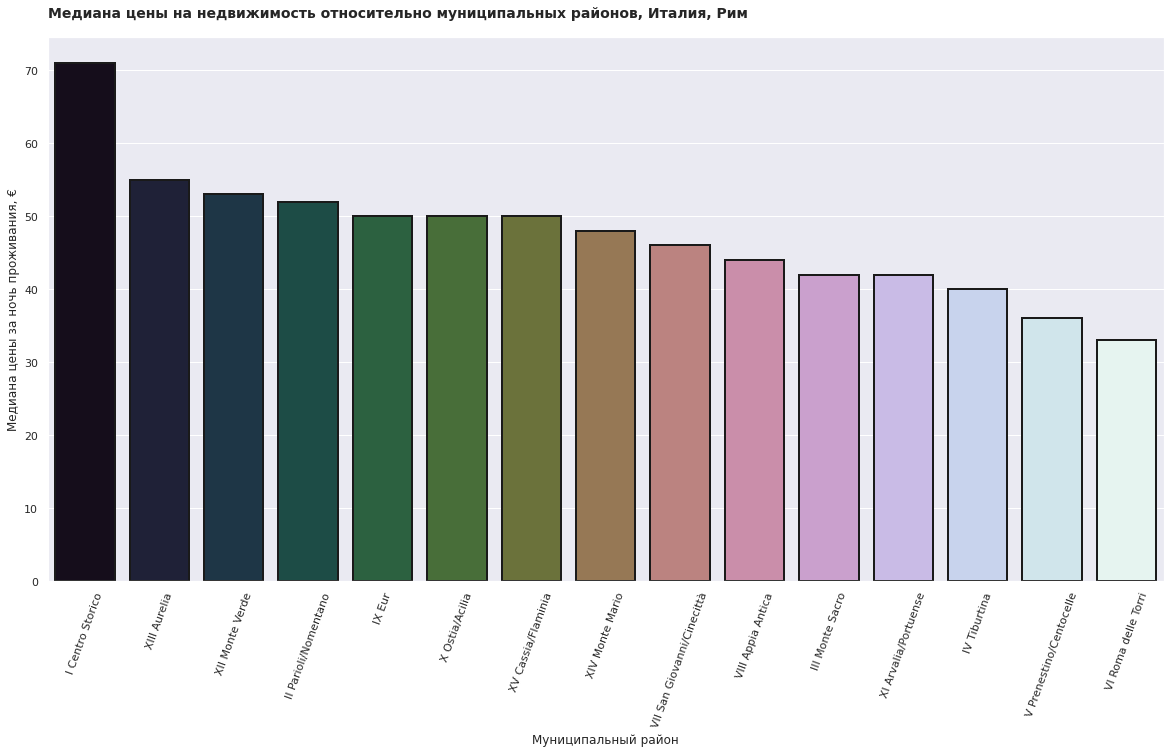

In [ ]:
sns.barplot(data=rome_prices_group, x='neighbourhood', y='price_median', palette='cubehelix', edgecolor="k", linewidth=2)
plt.xticks(rotation=70)
plt.title("Медиана цены на недвижимость относительно муниципальных районов, Италия, Рим",  fontsize=14, fontweight="bold", loc='left', pad=20)
plt.ylabel("Медиана цены за ночь проживания, €")
plt.xlabel("Муниципальный район")

Казалось бы, можно сделать вывод, что жить в центре дороже и лучше выбрать более отдаленные районы. Но действительно ли это так? Посмотрим какое количество объявлений приходится на каждый район

In [ ]:
listings['neighbourhood'].value_counts()

I Centro Storico              15064
VII San Giovanni/Cinecittà     2130
II Parioli/Nomentano           1994
XIII Aurelia                   1744
XII Monte Verde                1353
V Prenestino/Centocelle        1110
VIII Appia Antica               814
X Ostia/Acilia                  646
XIV Monte Mario                 579
XI Arvalia/Portuense            544
IV Tiburtina                    540
XV Cassia/Flaminia              506
III Monte Sacro                 430
IX Eur                          343
VI Roma delle Torri             256
Name: neighbourhood, dtype: int64

In [ ]:
# цена аренды в центре очень различается
centro = listings.query('neighbourhood == "I Centro Storico"')
centro['price_euro'].describe()

count    15064.000000
mean        97.102894
std        125.752317
min          7.000000
25%         48.000000
50%         71.000000
75%        105.000000
max       3735.000000
Name: price_euro, dtype: float64

В центре существенно больше предложений аренды жилья, чем в других районах, и как отмечено выше, это 54% от всех предложений в городе. Цена аренды в городе имеет существенный разброс и даже медиана может не давать адекватной картины ценообразования в районе. Поэтому важно подробнее рассмотреть ***из каких именно объявлений состоит предложение жилья в каждом районе***. Для этого построим карту города и диаграмму рассеяния цен относительно каждого муниципального района. Отметим на карте некоторые из главных достопримечательностей города, с которыми чаще всего приезжают ознакомиться туристы, а также два основных аэропорта.

In [ ]:
# Возьмем 10 случайных достопримечательностей Рима
attractions = {'name': ['Coliseum', 'San Pietro', 'Roman forum', 'Altare della Patria', 'Piazza Campo dei Fiori', 'Pantheon', 'Fontana di Trevi', 
                        'Piazza di Spagna', "Castel Sant’Angelo", 'Terme di Caracalla', 'Villa Borghese'],
               'longitude': [12.5113, 12.49308, 12.48532, 12.4831, 12.47218, 12.47687, 12.48334, 12.48346, 12.46637, 12.49243, 12.48530], 
               'latitude': [41.8919, 41.89384, 41.89246, 41.89459, 41.89559, 41.89859, 41.90093, 41.90624, 41.90304, 41.87903, 41.91270]}


In [ ]:
airports = {'name': ['Fiumicino', 'Ciampino'],
               'longitude': [12.2508, 12.590987], 
               'latitude': [41.8044, 41.799065 ]}

In [ ]:
attractions = pd.DataFrame(attractions)
airports = pd.DataFrame(airports)

In [ ]:
# построим карту Рима с разграничением на районы
map_df = gpd.read_file('neighbourhoods.geojson')
map_df

neighbourhood  ...                                           geometry
0             I Centro Storico  ...  MULTIPOLYGON (((12.44396 41.93390, 12.44472 41...
1              III Monte Sacro  ...  MULTIPOLYGON (((12.56321 42.07464, 12.56269 42...
2                 IV Tiburtina  ...  MULTIPOLYGON (((12.63542 41.95729, 12.63696 41...
3          VI Roma delle Torri  ...  MULTIPOLYGON (((12.70671 41.93375, 12.70691 41...
4   VII San Giovanni/Cinecittà  ...  MULTIPOLYGON (((12.51668 41.89194, 12.52266 41...
5            VIII Appia Antica  ...  MULTIPOLYGON (((12.48108 41.87642, 12.48137 41...
6                       IX Eur  ...  MULTIPOLYGON (((12.47554 41.84734, 12.47616 41...
7               X Ostia/Acilia  ...  MULTIPOLYGON (((12.35255 41.80295, 12.35351 41...
8         XI Arvalia/Portuense  ...  MULTIPOLYGON (((12.28997 41.82954, 12.28645 41...
9              XII Monte Verde  ...  MULTIPOLYGON (((12.25065 41.87581, 12.24905 41...
10                XIII Aurelia  ...  MULTIPOLYGON (((12.30750 41.96183, 12.30996 41...
11             XIV Monte Mario  ...  MULTIPOLYGON (((12.29248 42.03120, 12.29396 42...
12          XV Cassia/Flaminia  ...  MULTIPOLYGON (((12.34895 42.10263, 12.35080 42...
13     V Prenestino/Centocelle  ...  MULTIPOLYGON (((12.61538 41.89946, 12.61529 41...
14        II Parioli/Nomentano  ...  MULTIPOLYGON (((12.50098 41.94215, 12.50117 41...

[15 rows x 3 columns]

In [ ]:
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        15 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             15 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 488.0+ bytes


In [ ]:
map_df.drop(columns=['neighbourhood_group'], axis=1, inplace=True)

***Разделим все предложения по аренде на два ценовых сегмента "> 200 евро" и "< 200 евро"***
* ***Предложения жилья с ценой ниже 200 евро за ночь***

In [ ]:
price_less = listings.query('price_euro < 200')
price_more= listings.query('price_euro > 200')

<Figure size 1440x1080 with 0 Axes>

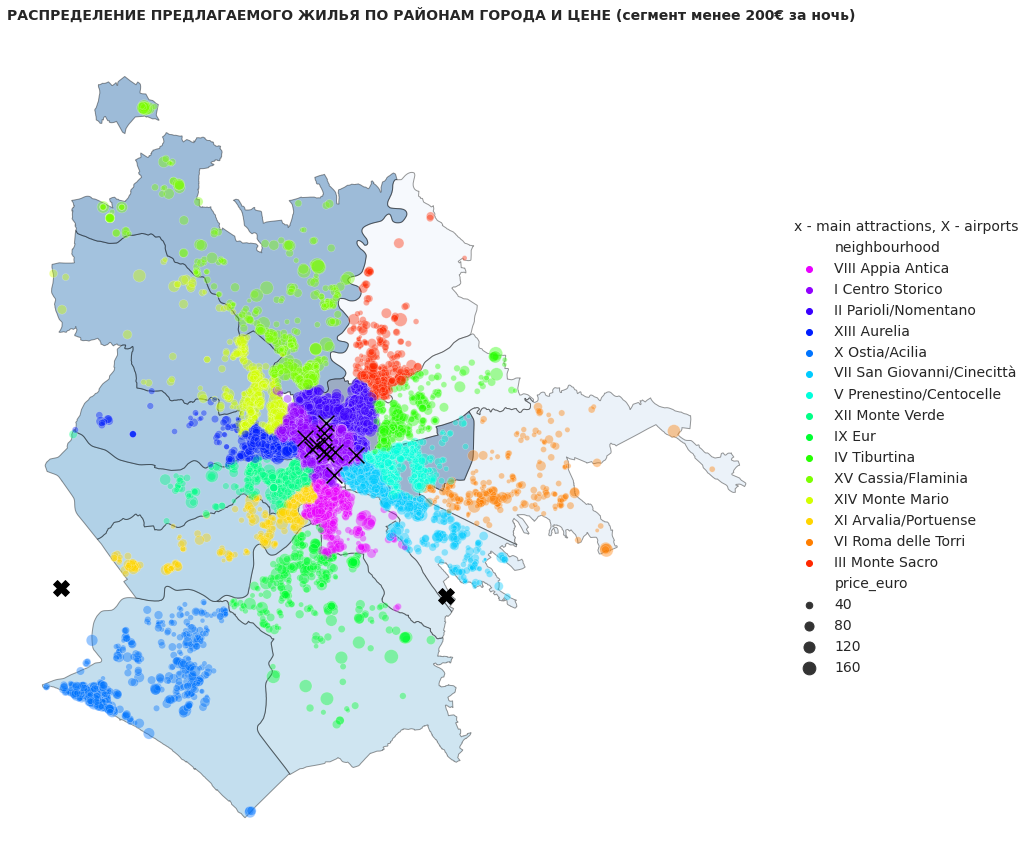

In [ ]:
plt.figure(figsize=(20,15))
map_df.plot(figsize=(20,15), colormap='Blues', edgecolor='black', alpha=0.4)
sns.scatterplot(price_less['longitude'], price_less['latitude'], hue=price_less['neighbourhood'], 
                size=price_less["price_euro"], sizes=(10, 200), palette='gist_rainbow_r', alpha=0.4)
plt.scatter(attractions['longitude'], attractions['latitude'], c='black', s=250, marker='x')
plt.scatter(airports['longitude'], airports['latitude'], c='black', s=250, marker='X')
plt.ioff()
plt.title("РАСПРЕДЕЛЕНИЕ ПРЕДЛАГАЕМОГО ЖИЛЬЯ ПО РАЙОНАМ ГОРОДА И ЦЕНЕ (сегмент менее 200€ за ночь)",  fontsize=14, fontweight="bold", loc='left', pad=20)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize = 14, title="x - main attractions, X - airports", title_fontsize = 14)

In [ ]:
# сделаем выборку из 3000 наблюдений для более читаемой визуализации
price_less = listings.query('price_euro < 200').head(3000)

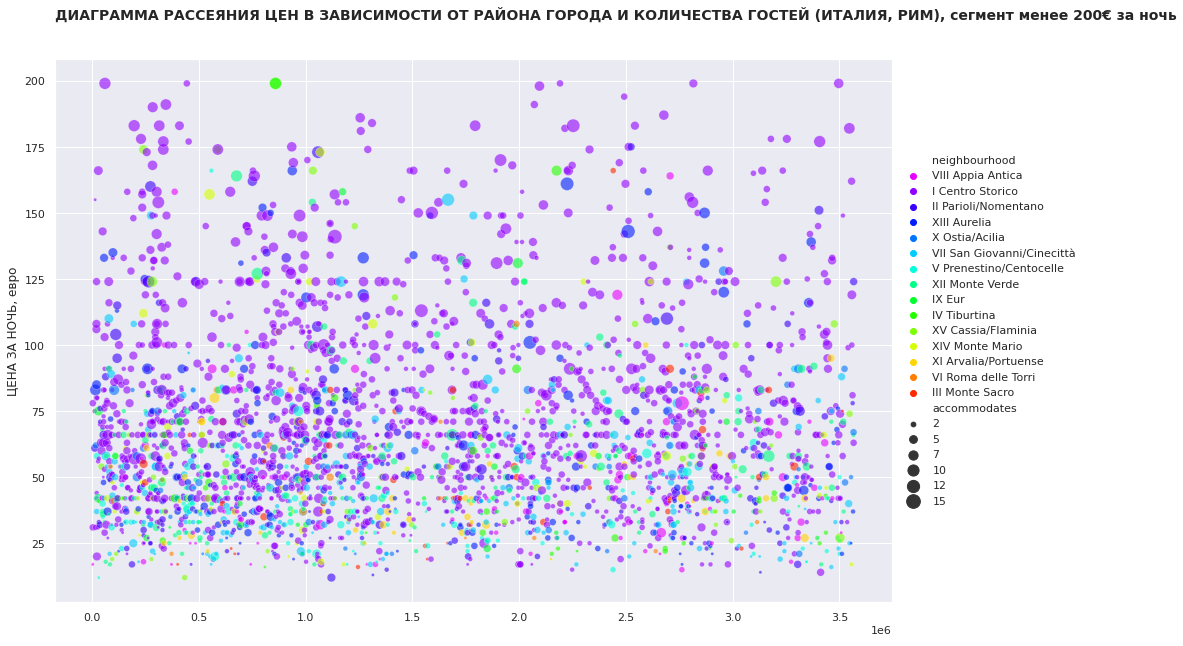

In [ ]:
plt.figure(figsize=(15,10))
plt.ylabel("ЦЕНА ЗА НОЧЬ, евро")
plt.xlabel(" ")
plt.title("ДИАГРАММА РАССЕЯНИЯ ЦЕН В ЗАВИСИМОСТИ ОТ РАЙОНА ГОРОДА И КОЛИЧЕСТВА ГОСТЕЙ (ИТАЛИЯ, РИМ), сегмент менее 200€ за ночь",  
          fontsize=14, pad=40, loc='left', fontweight="bold")
sns.scatterplot(data=price_less, y='price_euro', x='id', palette='gist_rainbow_r', hue='neighbourhood', size="accommodates",sizes=(10, 200), alpha=0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

* Большая часть всех предложений сконцентрирована в историческом центре города (I Centro Storico), также существенное количество предложений расположено в прилегающему к нему району II Parioli/Nomentano (третий по кол-ву объявлений). Основная часть часто посещаемых достопримечательностей, также сконцентрирована в историческом центре или расположена максимально к нему близко.
* Предложения в других районах имеют основную тенденцию "притяжения" и увеличения концентрации в направлении к центральному району (I Centro Storico)
* Район VII San Giovanni/Cinecittà (второй по кол-ву объявлений) помимо центрально-направленной тенденции имеет концентрацию предложений вблизи аэропорта Чампино, поэтому предложения распределены достаточно равномерно по территории района
* Районы X Ostia/Acilia и XI Arvalia/Portuense обладают в свою очередь  дополнительным "центром притяжения" - международным аэропортом Фьюмичино. Район X Ostia/Acilia также имеет сконцентрированные предложения у приморских территорий.

* Ценовая политика предложений различна, в любом районе города можно выбрать на любой кошелек. Из-за высокого разброса, реально **цена слабо зависит от расположения**, то есть даже в самом центре (где медиана цены составила 71 евро) можно найти весьма недорогое жилье (в том числе, в котором можно разместиться компанией в несколько человек) и таких предложений достаточно много, а ценовая политика строится, по большей части, на основании других факторов. 

* ***Предложения жилья с ценой выше 200 евро за ночь***

<Figure size 1440x1080 with 0 Axes>

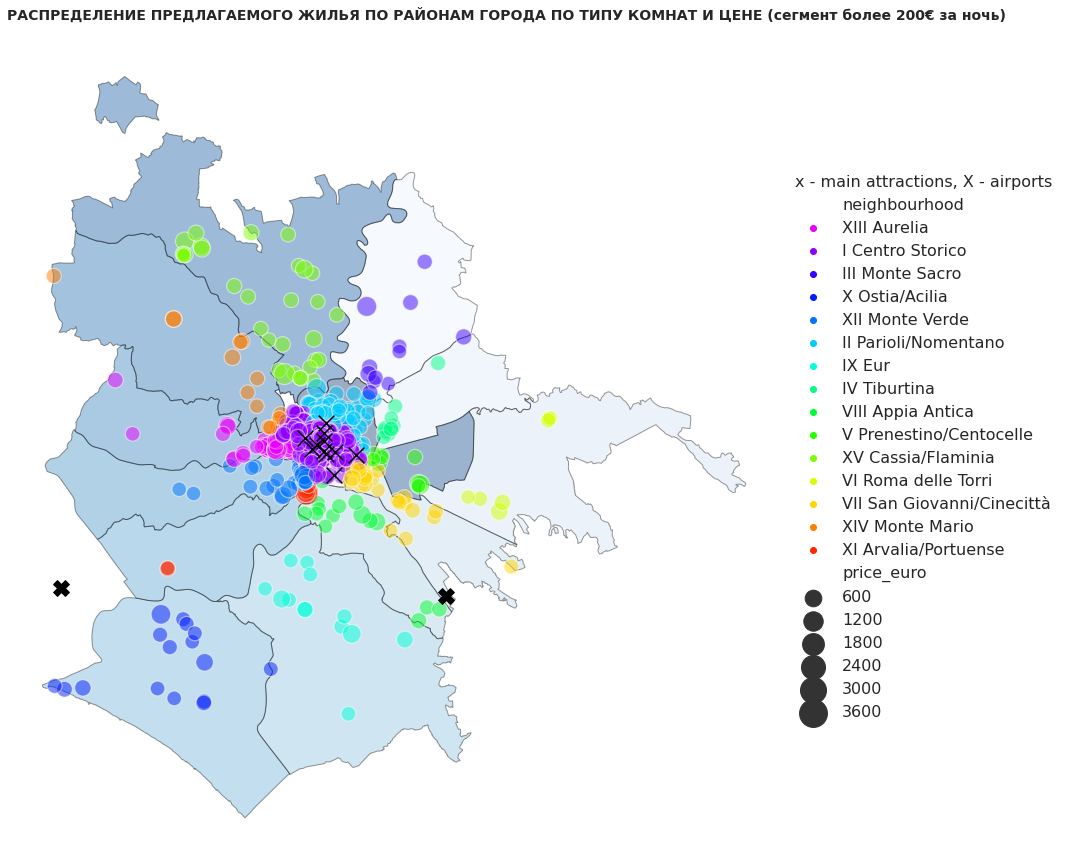

In [ ]:
plt.figure(figsize=(20,15))
map_df.plot(figsize=(20,15), colormap='Blues', edgecolor='black', alpha=0.4)
sns.scatterplot(price_more['longitude'], price_more['latitude'], hue=price_more['neighbourhood'], 
                size=price_more["price_euro"], sizes=(210, 800), palette='gist_rainbow_r', alpha=0.5)
plt.scatter(attractions['longitude'], attractions['latitude'], c='black', s=250, marker='x')
plt.scatter(airports['longitude'], airports['latitude'], c='black', s=250, marker='X')
plt.ioff()
plt.title("РАСПРЕДЕЛЕНИЕ ПРЕДЛАГАЕМОГО ЖИЛЬЯ ПО РАЙОНАМ ГОРОДА ПО ТИПУ КОМНАТ И ЦЕНЕ \
(сегмент более 200€ за ночь)",  fontsize=14, fontweight="bold", loc='left', pad=20)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize = 16, title="x - main attractions, X - airports", title_fontsize = 16)

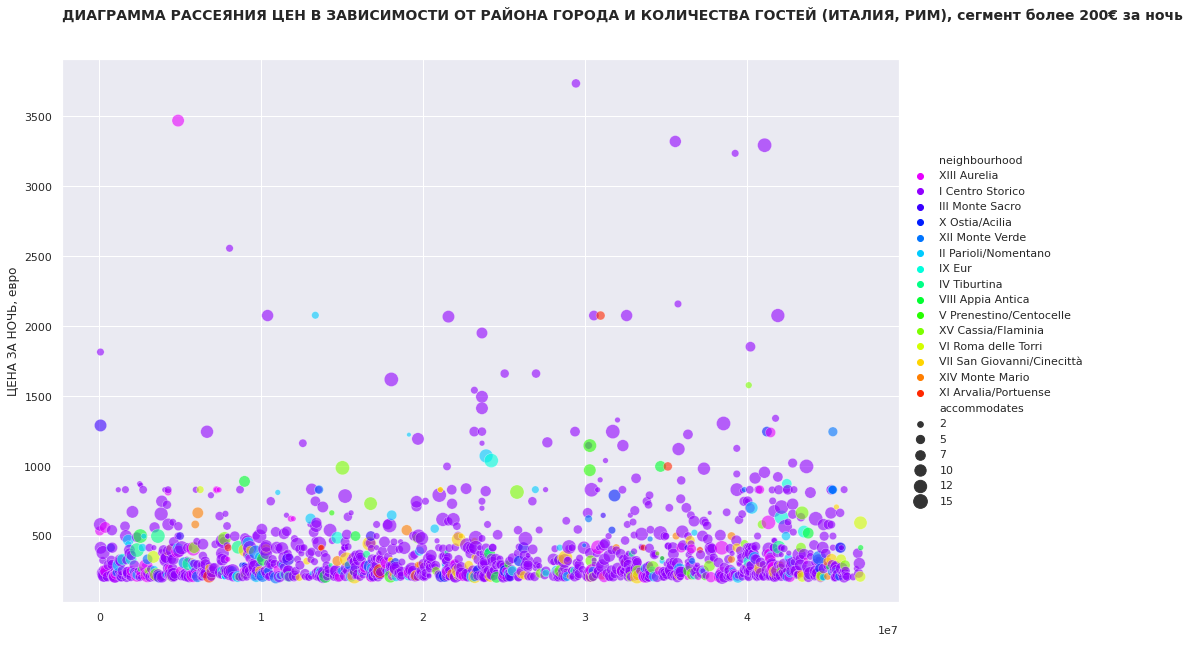

In [ ]:
plt.figure(figsize=(15,10))
plt.ylabel("ЦЕНА ЗА НОЧЬ, евро")
plt.xlabel(" ")
plt.title("ДИАГРАММА РАССЕЯНИЯ ЦЕН В ЗАВИСИМОСТИ ОТ РАЙОНА ГОРОДА И КОЛИЧЕСТВА ГОСТЕЙ (ИТАЛИЯ, РИМ), сегмент более 200€ за ночь",  
          fontsize=14, pad=40, loc='left', fontweight="bold")
sns.scatterplot(data=price_more, y='price_euro', x='id', hue='neighbourhood', size="accommodates",sizes=(20, 200), alpha=0.6, palette='gist_rainbow_r')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

В сегменте жилья дороже 200 евро за ночь также наблюдается максимальная концентрация предложений в историческом центре города, в остальных районах можно отметить только единичные объявления. Также в этом сегменте довольно часто встречаются предложения для размещения больших компаний гостей.

***ВЫВОД:*** если цель посещения города именно туризм и посещение достопримечательностей, то нет смысла искать жильё далеко от муниципального района I Centro Storico и тратить драгоценное время путешествия на перемещения по городу из отдаленных районов в центр и обратно (а также деньги на билеты или такси), так как существенной разницы в цене между центром и отдаленными районами города не прослеживается. Если же самый центр города покажется слишком шумным и полным суеты, то есть множество предложений в  II Parioli/Nomentano, району близко расположенному к центру города, но намного более размеренному и спокойному.

Но, если цена слабо зависит от расположения, то какие же факторы ёё определяют?

***Ценообразование и цена***

***Что нам уже известно:***

* Есть часть предложений с экстремально высокой ценой за ночь - цена выглядит умышленно завышенной, видимо, эти объявления временно 'заморожены' или хосты проверяют забронирует ли кто-то предложенную недвижимость за такую цену, или цена указана не за ночь, а за минимальный период аренды
* Разброс цен по городу слабо подчиняется территориальному признаку

In [ ]:
mean_pr = listings['price_euro'].mean()
median_pr = listings['price_euro'].median()
mode_pr = listings['price_euro'].mode()[0]
std = listings['price_euro'].std()

In [ ]:
print(f'Средняя заявленной цены по данным сервиса Airbnb в Риме - {round(mean_pr)} евро, медиана - {round(median_pr)} евро, мода - {round(mode_pr)} евро, среднеквадратическое отклонение - {round(std)}')

Средняя заявленной цены по данным сервиса Airbnb в Риме - 81 евро, медиана - 58 евро, мода - 42 евро, среднеквадратическое отклонение - 109


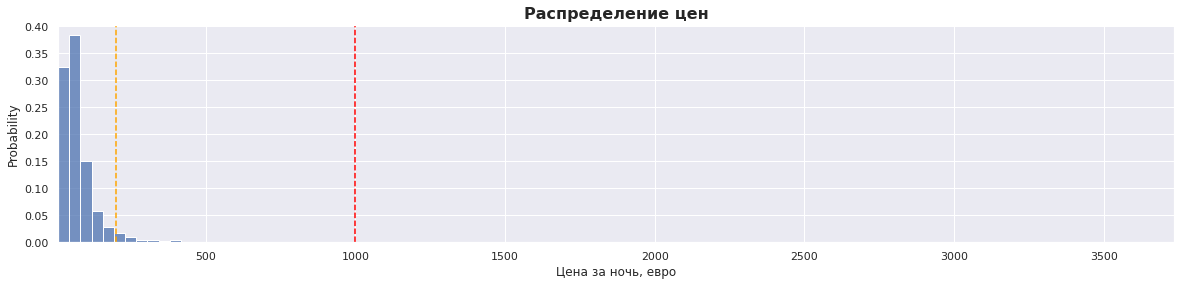

In [ ]:
# Распределение цен 
#Разделим на 3 сегмента (до 200 евро, от 201 до 1000, от 1001 и выше)
plt.figure(figsize=(20,4))
sns.histplot(data=listings, x='price_euro', stat='probability', bins=100)
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Распределение цен", fontsize=16, fontweight="bold")
plt.xlabel("Цена за ночь, евро")
plt.show()

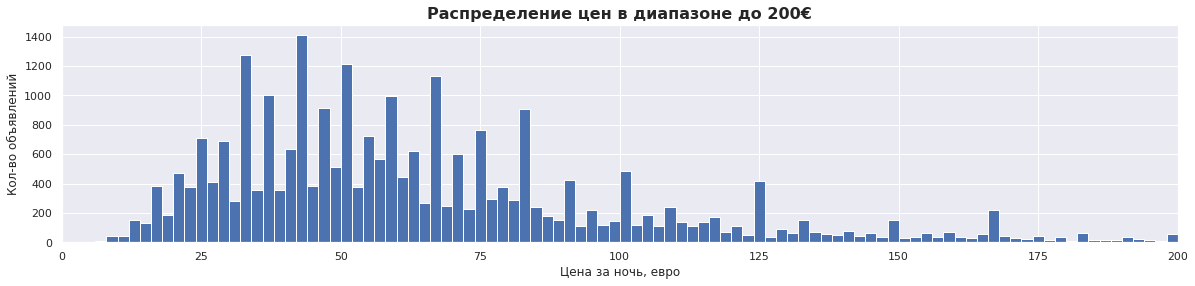

In [ ]:
# Большая часть объявлений лежит в этом диапазоне
plt.figure(figsize=(20,4))
listings['price_euro'].hist(bins=100, range=(0, 200))
plt.margins(x=0)
plt.title("Распределение цен в диапазоне до 200€", fontsize=16, fontweight="bold")
plt.xlabel("Цена за ночь, евро")
plt.ylabel("Кол-во объявлений")
plt.show()

In [ ]:
prlow = listings.query('price_euro < 200')
prlow.shape

(26596, 37)

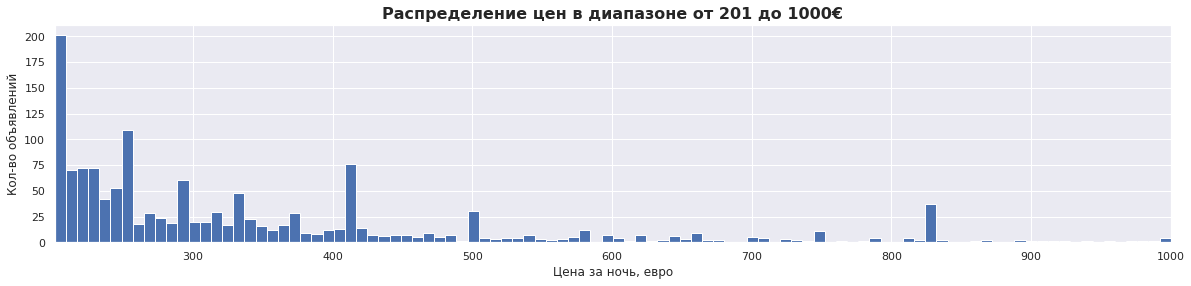

In [ ]:
# Количество объявлений существенно сократилось
plt.figure(figsize=(20,4))
listings['price_euro'].hist(bins=100, range=(201, 1000))
plt.margins(x=0)
plt.title("Распределение цен в диапазоне от 201 до 1000€", fontsize=16, fontweight="bold")
plt.xlabel("Цена за ночь, евро")
plt.ylabel("Кол-во объявлений")
plt.show()

In [ ]:
prmed = listings.query('price_euro > 201 and price_euro <= 1000')
prmed.shape

(1395, 37)

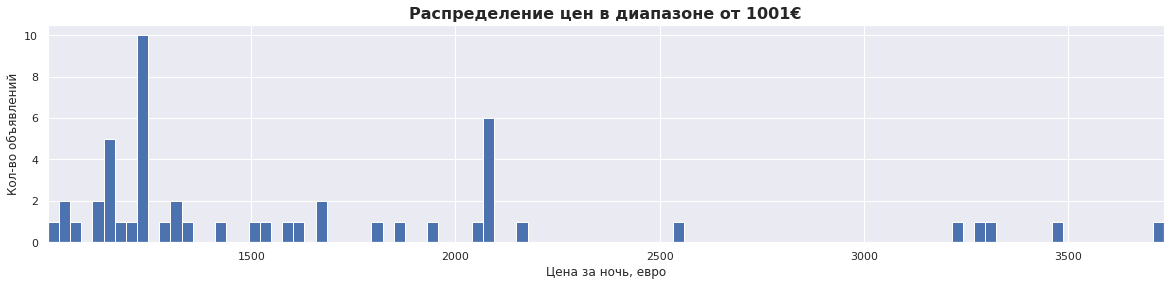

In [ ]:
# в этом диапазоне лежит крайне небольшое количество объявлений
plt.figure(figsize=(20,4))
listings['price_euro'].hist(bins=100, range=(1001, max(listings['price_euro'])))
plt.margins(x=0)
plt.title("Распределение цен в диапазоне от 1001€", fontsize=16, fontweight="bold")
plt.xlabel("Цена за ночь, евро")
plt.ylabel("Кол-во объявлений")
plt.show()

In [ ]:
prhigh = listings.query('price_euro >= 1001')
prhigh.shape

(51, 37)

In [ ]:
# взаимосвязь цены и ценообразующих критериев
price_corr = listings[['price_euro', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'bathrooms_private']]

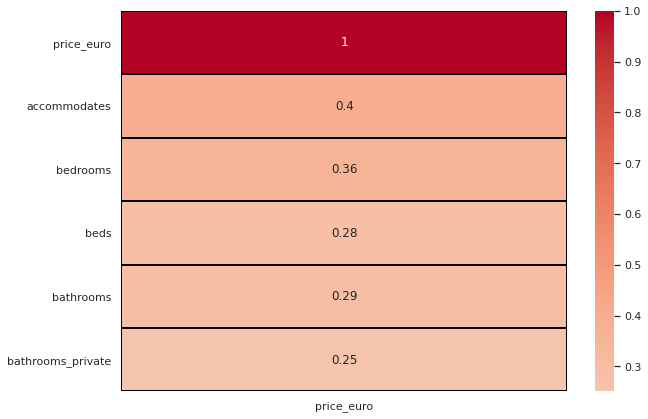

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(price_corr.corr(method='kendall')[['price_euro']], cmap='coolwarm', center=0, linecolor='black', annot=True, linewidths=1)

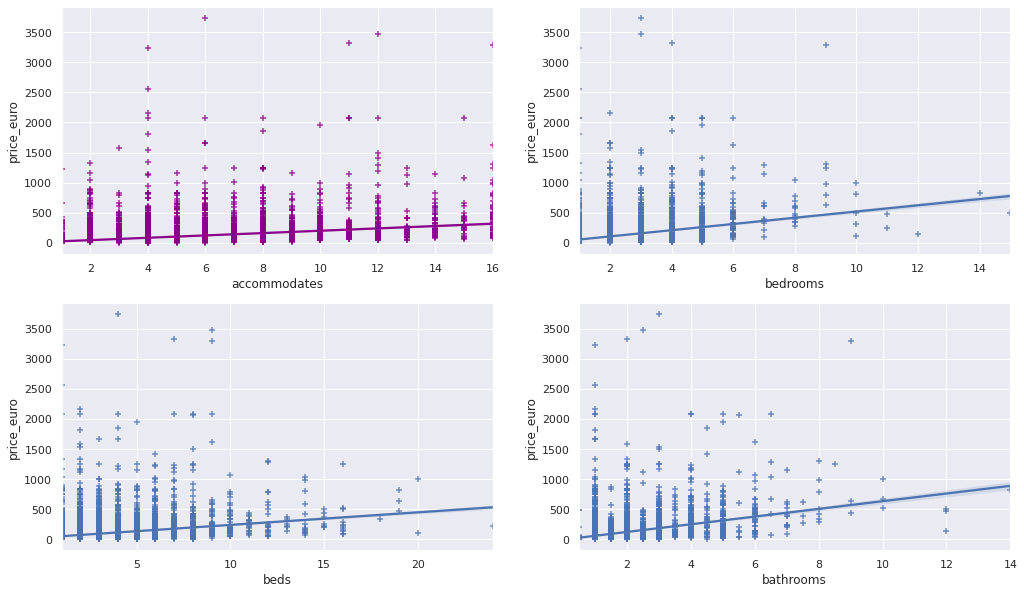

In [ ]:

sns.set(rc={'figure.figsize':(17,10)})
fig.suptitle('Взаимосвязь цены и ценообразующих критериев',  fontsize=16, fontweight="bold")
fig, axes = plt.subplots(2,2)
sns.regplot(ax=axes[0,0], y = "price_euro", x = 'accommodates', data = price_corr, marker='+', color='darkmagenta')
sns.regplot(ax=axes[0,1],  y = "price_euro", x = 'bedrooms', data = price_corr, marker='+')
sns.regplot(ax=axes[1,0],  y = "price_euro", x = 'beds', data = price_corr, marker='+')
sns.regplot(ax=axes[1,1],  y ="price_euro", x = 'bathrooms', data = price_corr, marker='+')

* ***ВЫВОД:*** наибольшая взаимосвязь прослеживается между ценой и количеством размещенных гостей, также можно отметить связь с количеством спален, кроватей и ванных комнат

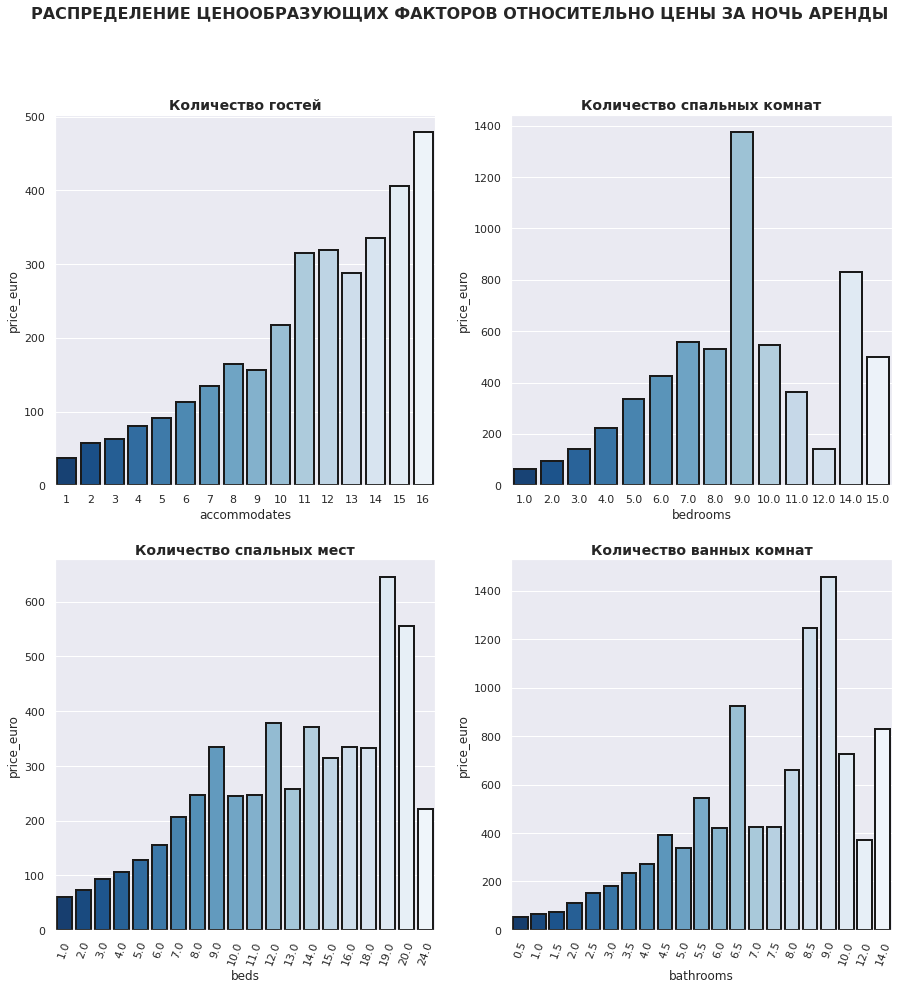

In [ ]:

fig, axes = plt.subplots(2,2, figsize=(15, 15))
fig.suptitle('РАСПРЕДЕЛЕНИЕ ЦЕНООБРАЗУЮЩИХ ФАКТОРОВ ОТНОСИТЕЛЬНО ЦЕНЫ ЗА НОЧЬ АРЕНДЫ',  fontsize=16, fontweight="bold")

sns.barplot(ax=axes[0,0], y = "price_euro", x = 'accommodates', data = price_corr, palette='Blues_r', edgecolor="k", linewidth=2, ci=None)
axes[0,0].set_title('Количество гостей', fontsize=14, fontweight="bold", pad=5)
sns.barplot(ax=axes[0,1],  y = "price_euro", x = 'bedrooms', data = price_corr, palette='Blues_r', edgecolor="k", linewidth=2, ci=None)
axes[0,1].set_title('Количество спальных комнат', fontsize=14, fontweight="bold", pad=5)
sns.barplot(ax=axes[1,0],  y = "price_euro", x = 'beds', data = price_corr, palette='Blues_r', edgecolor="k", linewidth=2, ci=None)
axes[1,0].set_title('Количество спальных мест', fontsize=14, fontweight="bold", pad=5)
sns.barplot(ax=axes[1,1],  y ="price_euro", x = 'bathrooms', data = price_corr, palette='Blues_r', edgecolor="k", linewidth=2, ci=None)
axes[1,1].set_title('Количество ванных комнат', fontsize=14, fontweight="bold", pad=5)
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=70)
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=70)

plt.show()


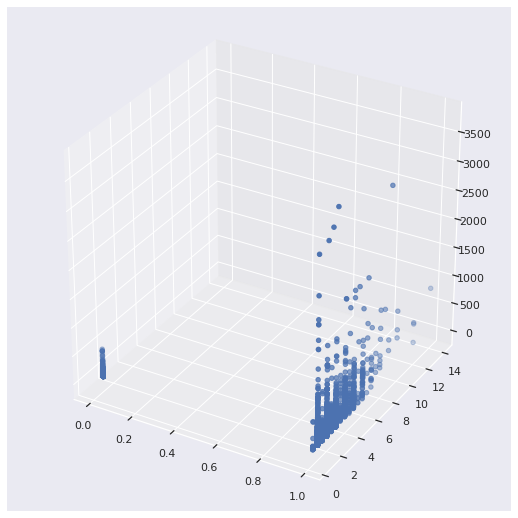

In [ ]:
# Цена на недвижимость с личной ванной комнатой и общей с другими гостями, будет различна
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(listings['bathrooms_private'], listings['bathrooms'], listings['price_euro'])
plt.show()

   ***НЕДВИЖИМОСТЬ***

***Что нам уже известно:***
* По типу недвижимости 89% предложений занято квартирами, но при желании можно снять и домик на дереве, иглу или комнату в замке
* В 63% предложений можно получить комнату или дом целиком
* Большая часть недвижимости вмещает от 1 до 5 гостей, но есть предложения и для компаний до 15 человек
* 68% включают в себя только одну спальню и одну ванную комнату (в 92% объявлений она предполагается личная)
* Чаще всего предлагаемое количество спальных мест от 1 до 3


In [ ]:
property_about = listings[['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'bathrooms_private']]

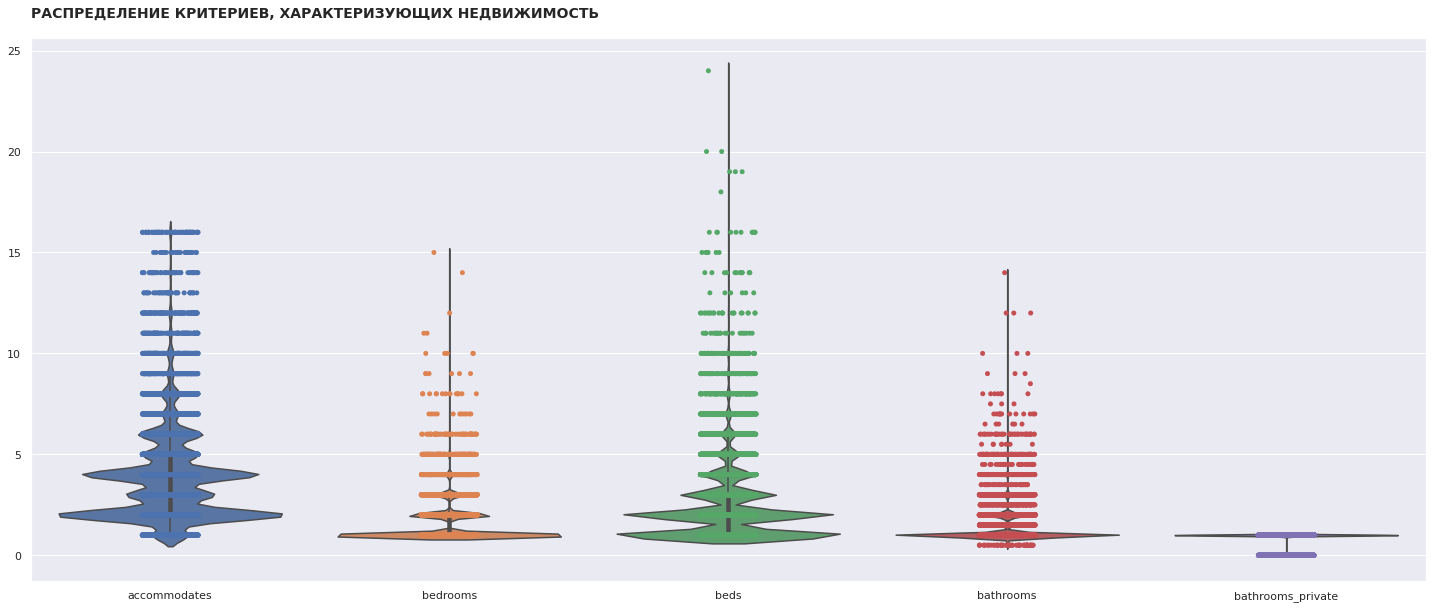

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
plt.title("РАСПРЕДЕЛЕНИЕ КРИТЕРИЕВ, ХАРАКТЕРИЗУЮЩИХ НЕДВИЖИМОСТЬ",  fontsize=14, fontweight="bold", loc='left', pad=20)
sns.violinplot(data=property_about, scale='width')
sns.stripplot(data=property_about)

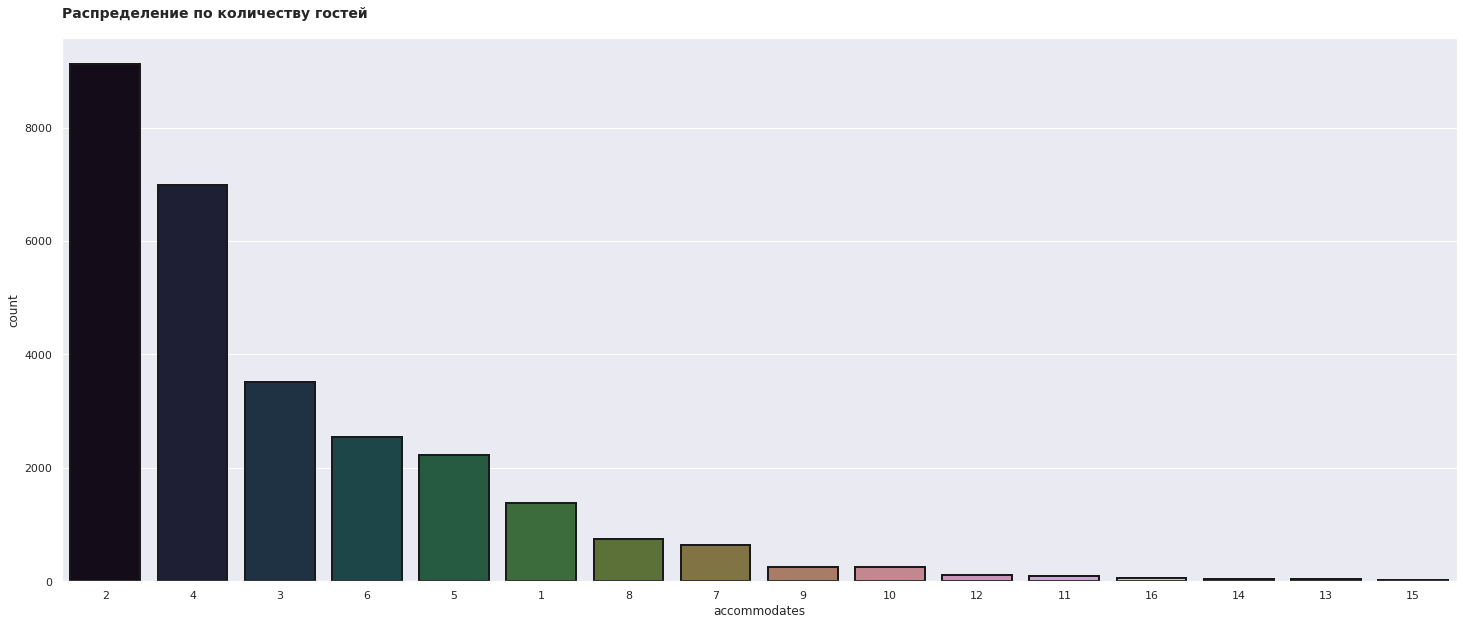

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
plt.title("Распределение по количеству гостей",  fontsize=14, fontweight="bold", loc='left', pad=20)
sns.countplot(data=property_about, x='accommodates', palette='cubehelix', edgecolor="k", linewidth=2, order=listings['accommodates'].value_counts().index)

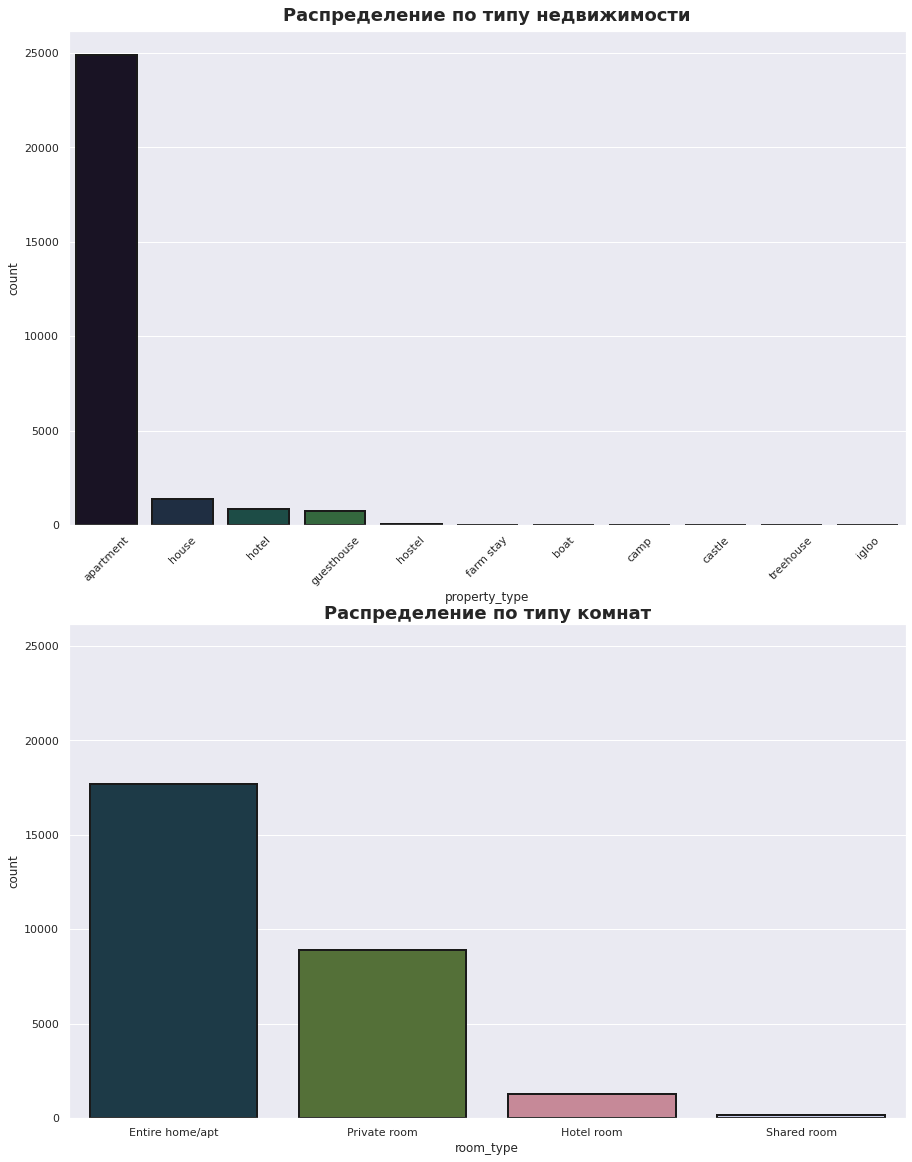

In [ ]:
sns.set(rc={'figure.figsize':(15,20)})
fig, axes = plt.subplots(2,1, sharey=True)
sns.countplot(ax=axes[0], data=listings, x='property_type', palette='cubehelix', edgecolor="k", linewidth=2, order=listings['property_type'].value_counts().index)
axes[0].set_title('Распределение по типу недвижимости', fontsize=18, fontweight="bold", pad=10)
sns.countplot(ax=axes[1], data=listings, x='room_type', palette='cubehelix', edgecolor="k", linewidth=2, order=listings['room_type'].value_counts().index)
axes[1].set_title('Распределение по типу комнат', fontsize=18, fontweight="bold", pad=5)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.show()


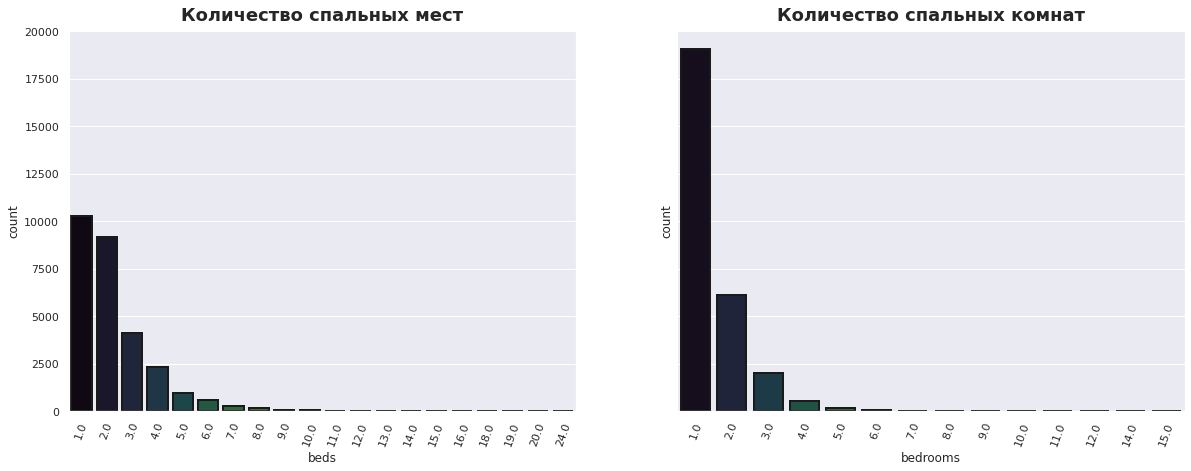

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
fig, axes = plt.subplots(1,2, sharey=True)
sns.countplot(ax=axes[0], x = 'beds', data = listings, palette='cubehelix', edgecolor="k", linewidth=2)
axes[0].set_title('Количество спальных мест', fontsize=18, fontweight="bold", pad=10)
sns.countplot(ax=axes[1], x = 'bedrooms', data = listings, palette='cubehelix', edgecolor="k", linewidth=2)
axes[1].set_title('Количество спальных комнат', fontsize=18, fontweight="bold", pad=10)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=70)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=70)
plt.show()


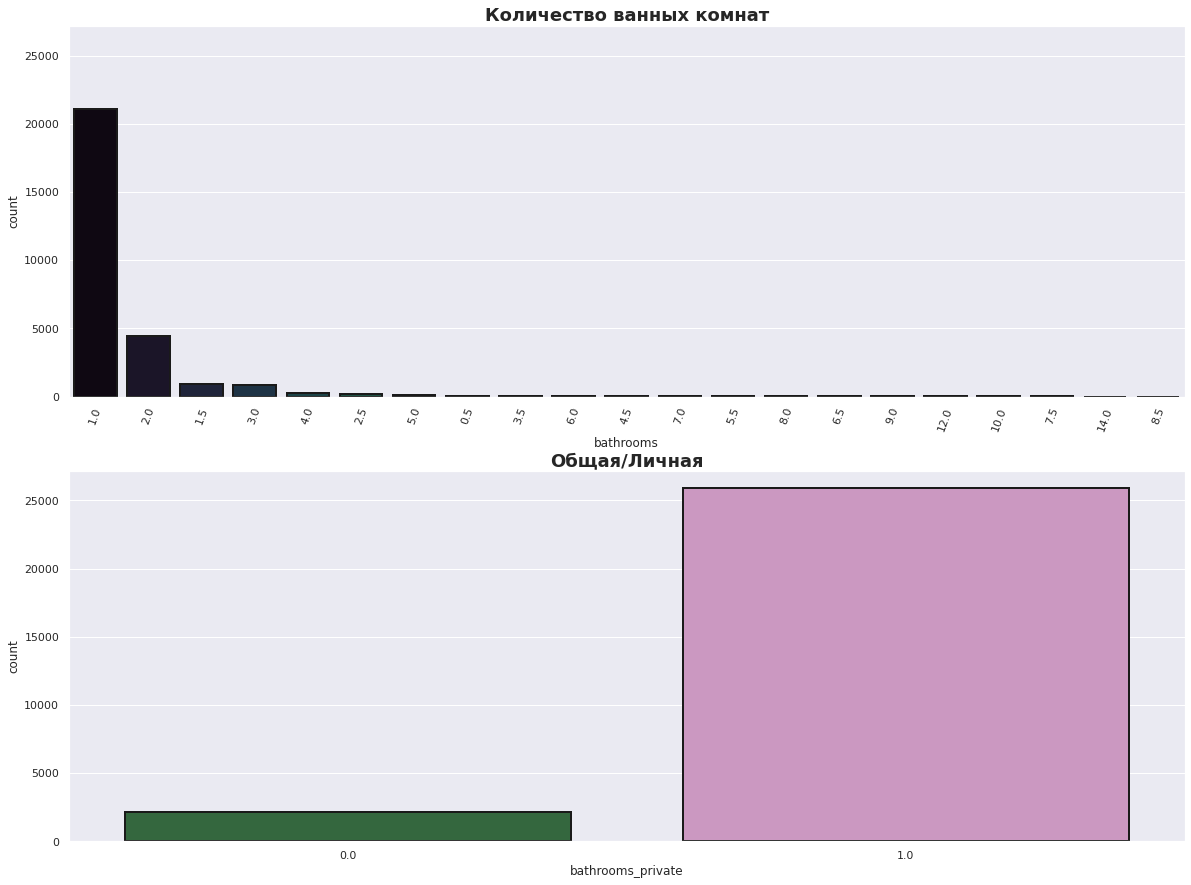

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
fig, axes = plt.subplots(2,1, sharey=True)
sns.countplot(ax=axes[0], x = 'bathrooms', data = listings, palette='cubehelix', edgecolor="k", linewidth=2, order=listings['bathrooms'].value_counts().index)
axes[0].set_title('Количество ванных комнат', fontsize=18, fontweight="bold", pad=5)
sns.countplot(ax=axes[1], x = 'bathrooms_private', data = listings, palette='cubehelix', edgecolor="k", linewidth=2)
axes[1].set_title('Общая/Личная', fontsize=18, fontweight="bold", pad=5)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=70)

plt.show()

<Figure size 1440x1080 with 0 Axes>

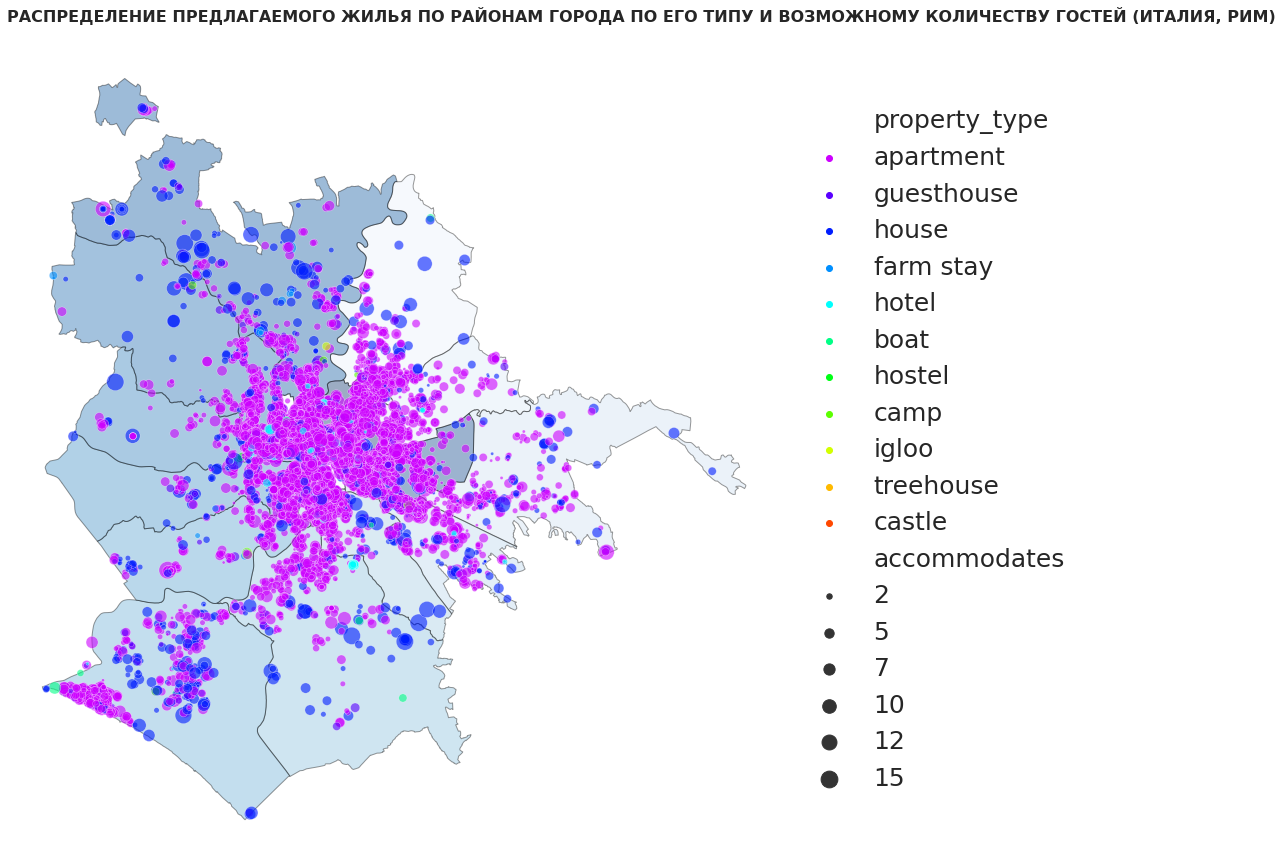

In [ ]:
plt.figure(figsize=(20,15))
map_df.plot(figsize=(20,15), colormap='Blues', edgecolor='black', alpha=0.4)
sns.scatterplot(listings['longitude'], listings['latitude'], hue=listings['property_type'], 
                size=listings["accommodates"], sizes=(10, 300), palette='gist_rainbow_r', alpha=0.6)
plt.ioff()
plt.title("РАСПРЕДЕЛЕНИЕ ПРЕДЛАГАЕМОГО ЖИЛЬЯ ПО РАЙОНАМ ГОРОДА ПО ЕГО ТИПУ И ВОЗМОЖНОМУ КОЛИЧЕСТВУ ГОСТЕЙ (ИТАЛИЯ, РИМ)", \
          fontsize=16, fontweight="bold", loc='left', pad=20)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize = 25)

***ВЫВОД:*** Как же будет выглядеть собирательный образ недвижимости, которую предложат гостю в Риме? ***Это квартира целиком в историческом центре города с одной спальной комнатой и одной кроватью, с одной отдельной ванной комнатой для двух гостей***

***ХОСТЫ***

***Что мы уже выяснили:***
* Хостами выступают не только частные лица, также есть представители риэлторских агентств, гостевых домов и отелей
* Меньше четверти хостов являются суперхостами
* 78% хостов прошла верификацию 
* Большая часть хостов зарегистрирована более 5 лет назад
* Половина хостов принимает всех обратившихся за арендой
* 45% хостов всегда отвечают на поступающие обращения
* Только 33% сдают только один объект недвижимости

Теперь немного о безопасности - как мы могли заметить, большая часть хостов прошла процедуру верификации, что безусловно делает процедуру сдачи недвижимости более безопасной. Интересно узнать, какие основные методы верификации хостов использует сервис Airbnb

In [ ]:
# Подсчитаем количество слов, обозначающий способ верификации и соберем их в новый датафрейм
verification_collect = Counter()
listings['host_verifications'].str.split().apply(verification_collect.update)
verification_collect = pd.Series(verification_collect).to_frame()

In [ ]:
verification_col = verification_collect.reset_index()

In [ ]:
# переименуем столбцы
verification_col.rename(columns={'index':'process', 0:'count'}, inplace=True)

In [ ]:
verification_col.sort_values(by='count', ascending=False, inplace=True)

Text(0.0, 1.0, 'СПОСОБЫ ВЕРИФИКАЦИИ ХОСТА')

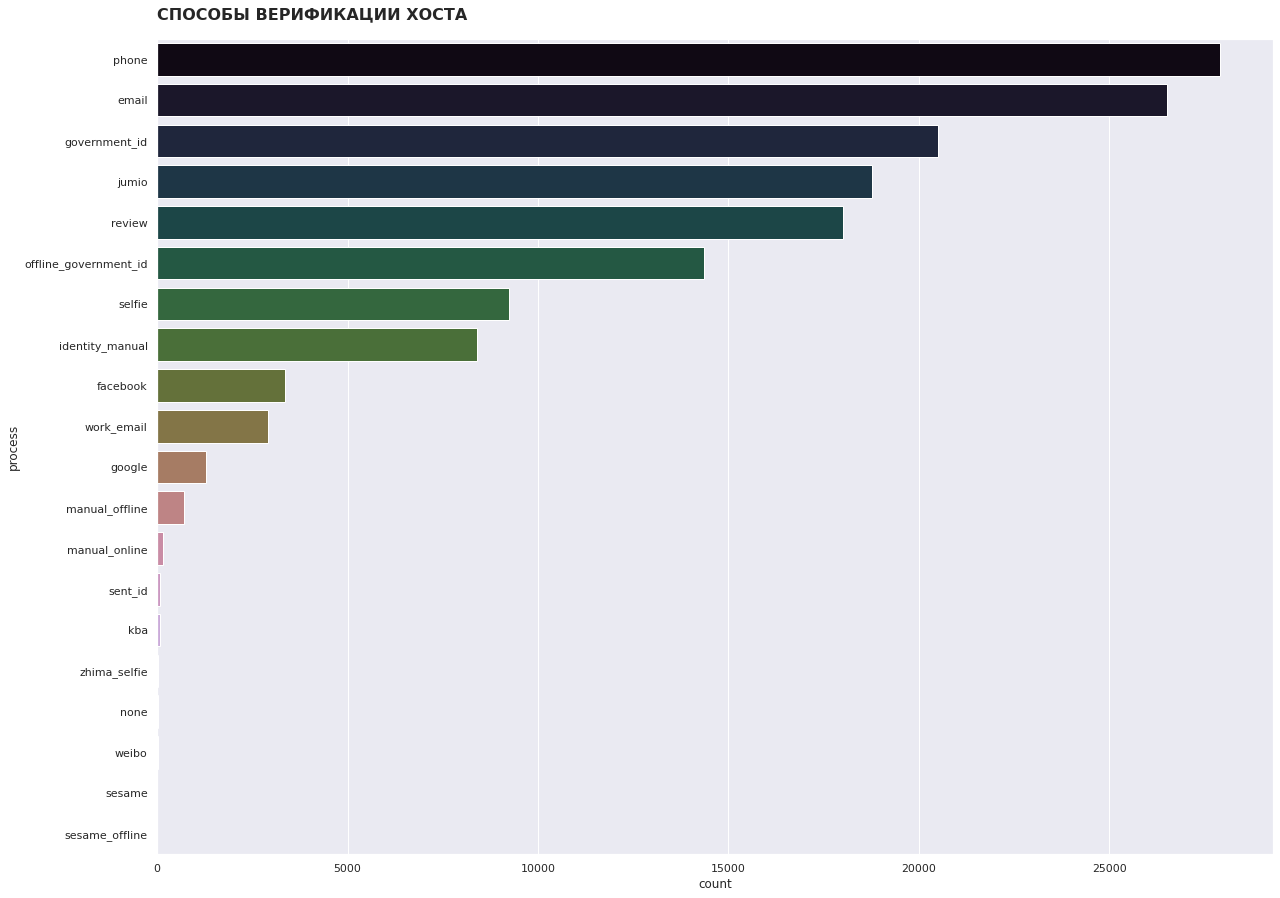

In [ ]:
sns.barplot(data=verification_col, x='count', y='process', orient='h', palette='cubehelix')
plt.title("СПОСОБЫ ВЕРИФИКАЦИИ ХОСТА", \
          fontsize=16, fontweight="bold", loc='left', pad=20)

Процедура верификации чаще всего состоит из нескольких компонентов (например, подтвержден номер телефона, электронная почта и удостоверение личности и сделано селфи)

Теперь посмотрим подробнее, что стоит за категорией "суперхост" и ***стоит ли специально ориентироваться на этот показатель при поиске жилья?***

In [ ]:
# для удобства стоит создать отдельный датафрейм для анализа данных о хостах
host = listings[['host_id', 'host_is_superhost', 'host_response_rate',	'host_acceptance_rate', 'host_since', 'host_days_active',	'host_listings_count',
                 'host_verifications',	'host_identity_verified', 'review_scores_rating', 'price_euro']]

In [ ]:
frequency = host[['host_id', 'host_is_superhost']].groupby('host_id', as_index=False).count().rename(columns={'host_is_superhost':'frequency'})

In [ ]:
host = host.merge(frequency, on='host_id')

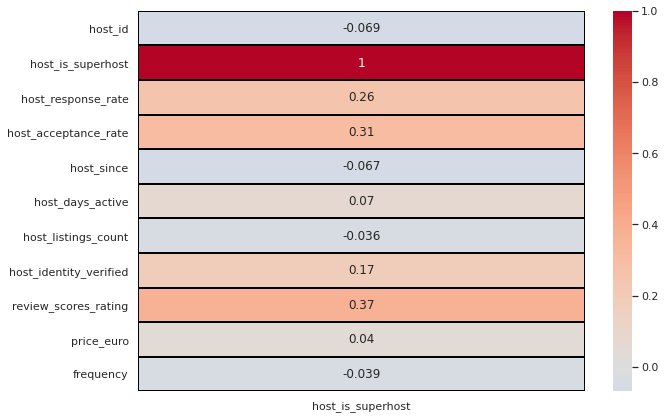

In [ ]:
# посмотрим, есть ли взамосвязь между признаками полученного датафрейма и категорией суперхост
plt.figure(figsize=(10, 7))
sns.heatmap(host.corr(method='spearman')[['host_is_superhost']], cmap='coolwarm', center=0, linecolor='black', annot=True, linewidths=1)

Исходя из данных, размещенных на сайте airbnb (https://www.airbnb.ru/d/superhost), на получение значка "Суперхост" влияют такие показатели как:
* общий рейтинг
* частота приема гостей
* частота отмены бронирований
* частота ответов на сообщения

Для полноценной оценки частоты приема гостей необходимы данные за более длительный период (1 год), но остальные указанные выше показатели действительно имеют некоторую положительную корреляцию с исследуемым признаком

[Text(0, 0, 'YES'), Text(0, 0, 'NO')]

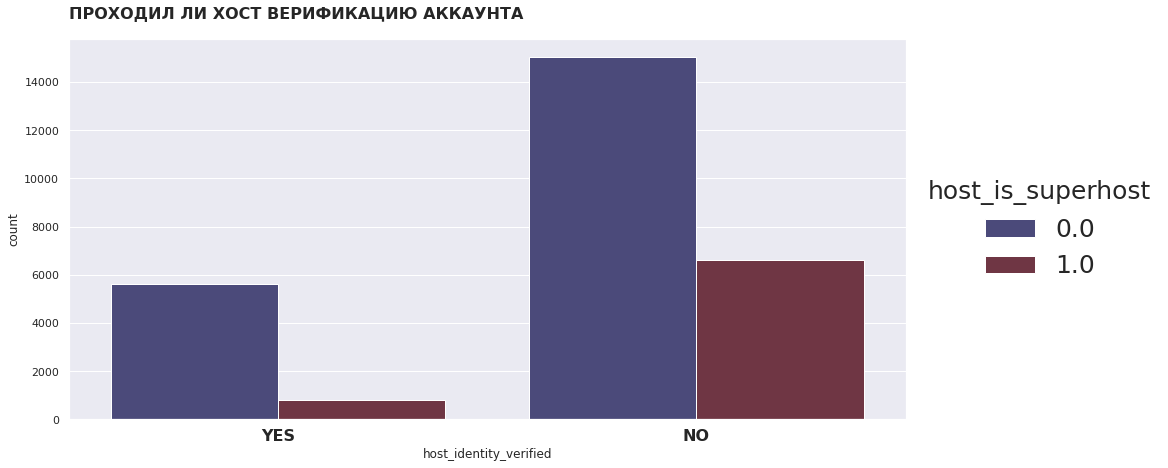

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
fig, ax = plt.subplots()
sns.countplot(x='host_identity_verified', data=host, hue='host_is_superhost', palette='icefire')
plt.title("ПРОХОДИЛ ЛИ ХОСТ ВЕРИФИКАЦИЮ АККАУНТА", \
          fontsize=16, fontweight="bold", loc='left', pad=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize = 25, title="host_is_superhost", title_fontsize = 25)

ax.set_xticklabels(['YES', 'NO'], fontsize=16, fontweight="bold")

Из прошедших верификацию хостов и суперхостов примерно равное количество, из тех, кто не прошёл - хостов немного больше

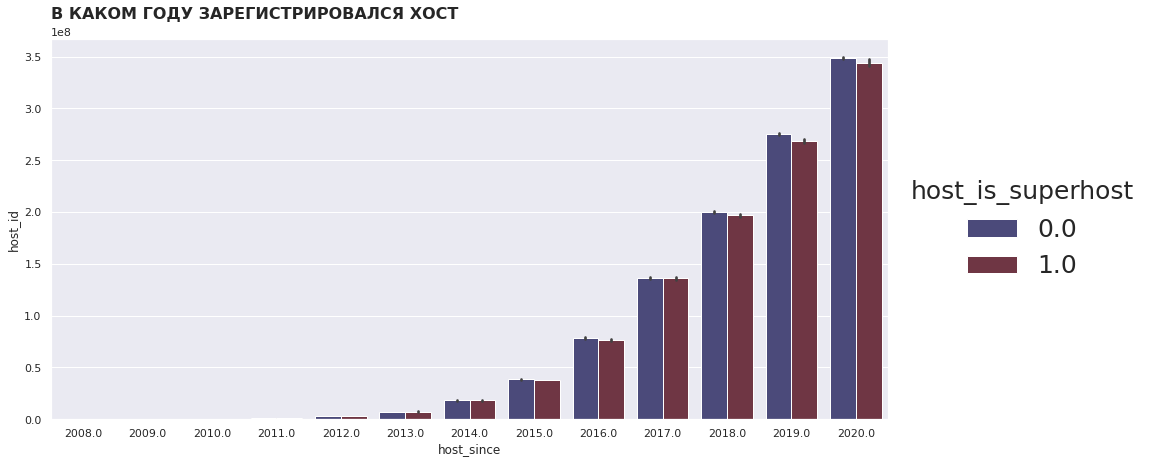

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='host_since', y="host_id", data=host, hue='host_is_superhost', palette='icefire')
plt.title("В КАКОМ ГОДУ ЗАРЕГИСТРИРОВАЛСЯ ХОСТ", \
          fontsize=16, fontweight="bold", loc='left', pad=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize = 25, title="host_is_superhost", title_fontsize = 25)

Особых различий по этому показателю между хостом и суперхостом нет 

In [ ]:
host_response_super = host.query('host_response_rate > 0 and host_is_superhost == 1')
host_response = host.query('host_response_rate > 0 and host_is_superhost != 1')

Text(0.5, 1.0, 'host')

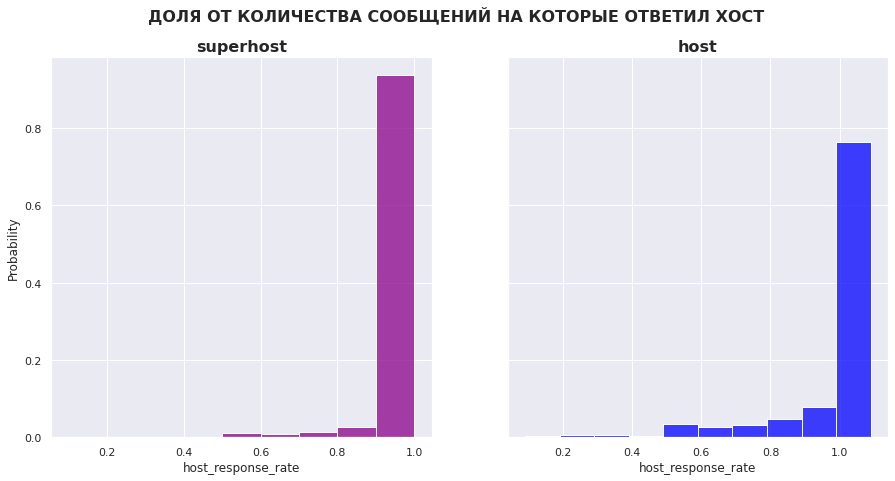

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('ДОЛЯ ОТ КОЛИЧЕСТВА СООБЩЕНИЙ НА КОТОРЫЕ ОТВЕТИЛ ХОСТ',  fontsize=16, fontweight="bold")
sns.histplot(ax=axes[0], data=host_response_super, x='host_response_rate', color='darkmagenta', binwidth=0.1, stat='probability')
axes[0].set_title('superhost', fontsize=16, fontweight="bold")
sns.histplot(ax=axes[1], data=host_response, x='host_response_rate', color='blue', binwidth=0.1, stat='probability')
axes[1].set_title('host', fontsize=16, fontweight="bold")

Суперхосты чаще отвечают на все сообщения, так как этот показатель является одним из требований для получения значка "superhost"

In [ ]:
host_acceptance_super = host.query('host_acceptance_rate > 0 and host_is_superhost == 1')
host_acceptance = host.query('host_acceptance_rate > 0 and host_is_superhost != 1')

Text(0.5, 1.0, 'host')

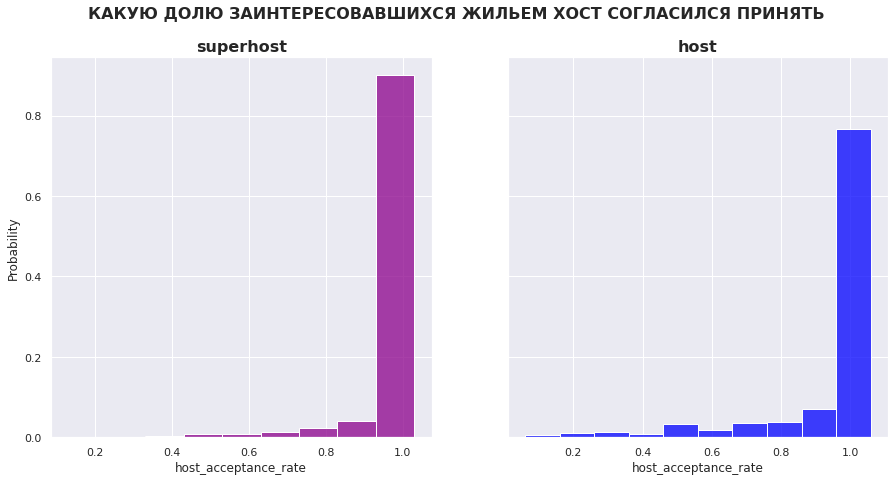

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('КАКУЮ ДОЛЮ ЗАИНТЕРЕСОВАВШИХСЯ ЖИЛЬЕМ ХОСТ СОГЛАСИЛСЯ ПРИНЯТЬ',  fontsize=16, fontweight="bold")
sns.histplot(ax=axes[0], data=host_acceptance_super, x='host_acceptance_rate', color='darkmagenta', binwidth=0.1, stat='probability')
axes[0].set_title('superhost', fontsize=16, fontweight="bold")
sns.histplot(ax=axes[1], data=host_acceptance, x='host_acceptance_rate', color='blue', binwidth=0.1, stat='probability')
axes[1].set_title('host', fontsize=16, fontweight="bold")

Суперхосты также реже отказывают гостям в приеме, так как частый отказ без уважительной причины может способствовать потере значка "superhost"

In [ ]:
# рассмотрим ценовой сигмент до 200 евро за ночь, так как ему принадлежит подавляющее число наблюдений 
price_super_host = host.query('price_euro < 200 and host_is_superhost == 1')
price_host = host.query('price_euro < 200 and host_is_superhost != 1')

Text(0.5, 1.0, 'host')

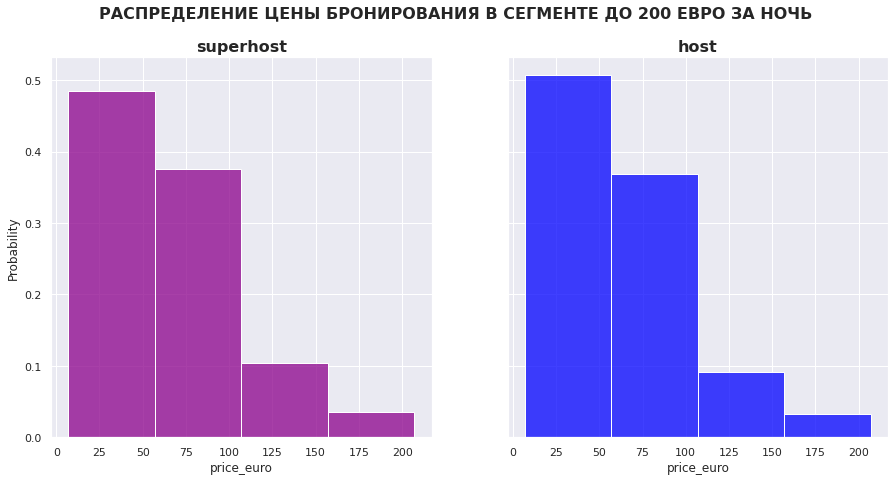

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('РАСПРЕДЕЛЕНИЕ ЦЕНЫ БРОНИРОВАНИЯ В СЕГМЕНТЕ ДО 200 ЕВРО ЗА НОЧЬ',  fontsize=16, fontweight="bold")
sns.histplot(ax=axes[0], data=price_super_host, x='price_euro', color='darkmagenta', binwidth=50, stat='probability')
axes[0].set_title('superhost', fontsize=16, fontweight="bold")
sns.histplot(ax=axes[1], data=price_host, x='price_euro', color='blue', binwidth=50, stat='probability')
axes[1].set_title('host', fontsize=16, fontweight="bold")

Значительных различий в цене также не обнаружено, но у суперхостов немного реже встречаются предложения бюджетного жилья до 50 евро за ночь и чуть больше предложений от 100 евро

In [ ]:
review_super_host = host.query('review_scores_rating > 0 and host_is_superhost == 1')
review_host = host.query('review_scores_rating > 0 and host_is_superhost != 1')

Text(0.5, 1.0, 'host')

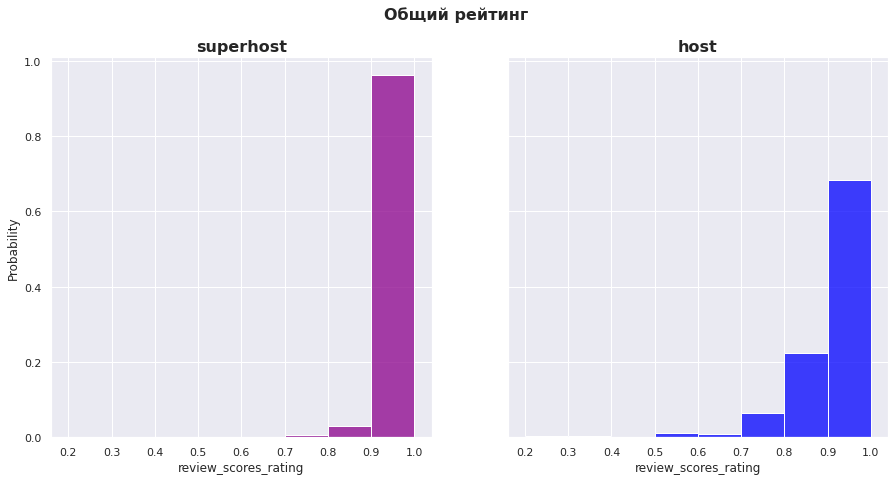

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('Общий рейтинг',  fontsize=16, fontweight="bold")
sns.histplot(ax=axes[0], data=review_super_host, x='review_scores_rating', color='darkmagenta', binwidth=0.1, stat='probability')
axes[0].set_title('superhost', fontsize=16, fontweight="bold")
sns.histplot(ax=axes[1], data=review_host, x='review_scores_rating', color='blue', binwidth=0.1, stat='probability')
axes[1].set_title('host', fontsize=16, fontweight="bold")

Суперхосты значительно чаще получают максимальные оценки в отзывах гостей (высокая оценка также является одним из критериев получения значка "superhost")

***ВЫВОД:*** Суперхост будет просто более отзывчивым хозяином с более стабильным сервисом (так как ему необходимо "держать марку"), с меньшей вероятностью неприятных сюрпризов по основным показателям его оценки. Если жилье необходимо на короткий срок и только на переночевать, то особой необходимости искать суперхоста нет. 

Каждый хост, размещая свое объявление, скорее всего стремится, чтобы его заметили и выбрали именно его предложение о сдаче жилья. Рассмотрим, ***какие слова чаще всего используют*** хосты в объявлениях, чтобы привлечь внимание гостей

In [ ]:
# подсчитаем отдельные слова в тексте объявления и соберем их в датафрейм
description_collect = Counter()
listings['description'].str.split().apply(description_collect.update)
description_collect = pd.Series(description_collect).to_frame()

In [ ]:
description_col = description_collect.reset_index()

In [ ]:
description_col.rename(columns={'index':'words', 0:'count'}, inplace=True)

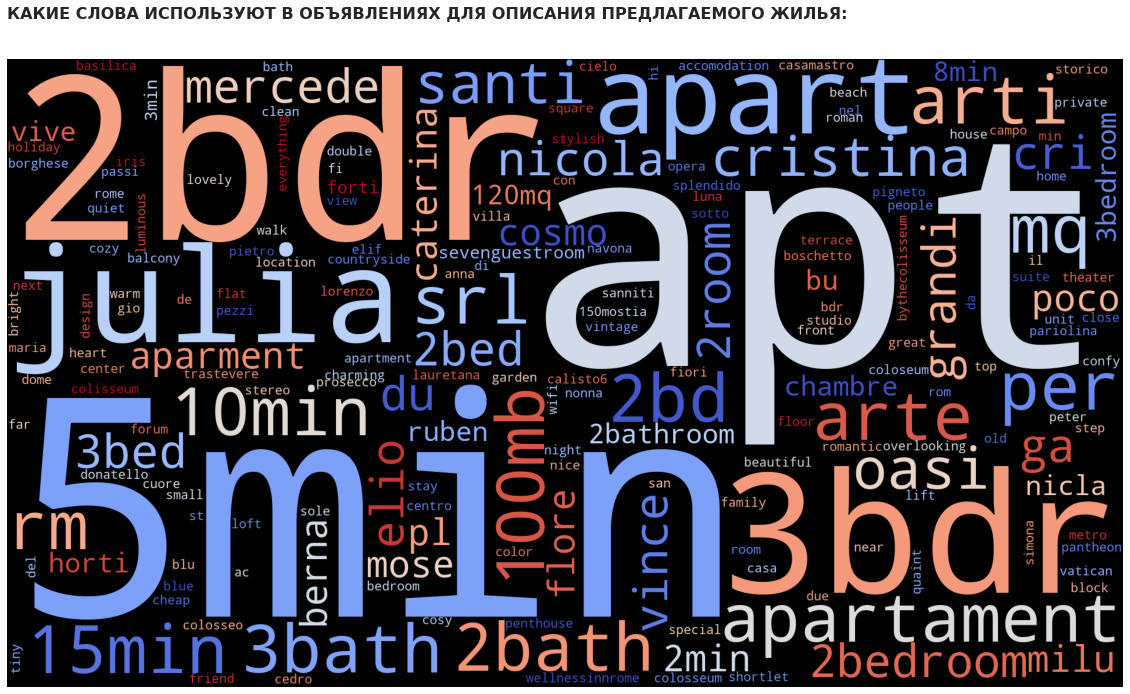

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
wordcloud = WordCloud(background_color='black', width=1920, height=1080, colormap='coolwarm').generate(" ".join(description_col['words']))
plt.imshow(wordcloud)
plt.title("КАКИЕ СЛОВА ИСПОЛЬЗУЮТ В ОБЪЯВЛЕНИЯХ ДЛЯ ОПИСАНИЯ ПРЕДЛАГАЕМОГО ЖИЛЬЯ:",  fontsize=16, fontweight="bold", loc='left', pad=40)
plt.axis('off')
plt.show()

***ВЫВОД:*** текст объявлений в основном далёк от художественного стиля и больше построен на описаниях. Хосты предпочитают в первую очередь подчеркнуть выгодность расположения и кратко дать описание по виду недвижимости (как можно увидеть это чаще всего апартаменты) и что она содержит (количество комнат, ванных, кроватей и тд.)

Теперь можно ознакомиться подробнее, ***какие удобства (и в каком количестве)*** в жилье чаще всего хосты могут предоставить своим гостям. Сначала рассмотрим количественное распределение.

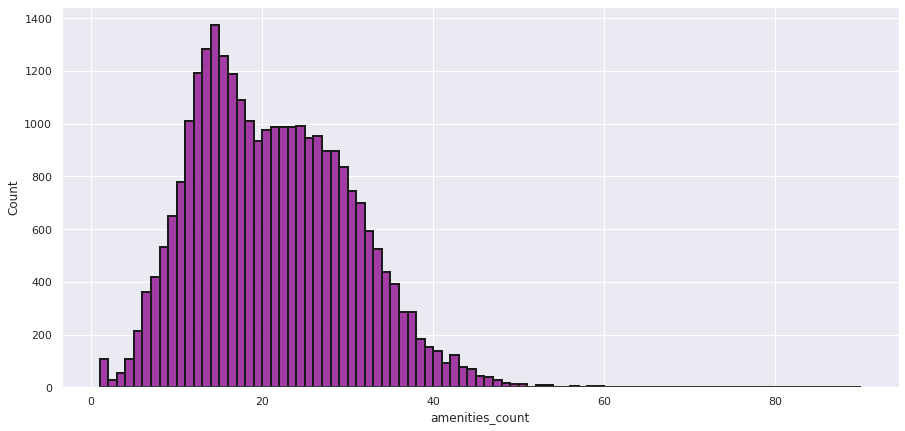

In [ ]:
#  чаще всего в объявлениях хосты озвучивают около 14 различных удобств для каждого объекта недвижимости
sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(data=listings, x='amenities_count', color='darkmagenta', binwidth=1, edgecolor="k", linewidth=2)


In [ ]:
# Теперь посмотрим, что именно предлагают хосты
# Воспользуемся счетчиком слов и cоздадим датафрейм
amenities_collect = Counter()
listings['amenities'].str.split().apply(amenities_collect.update)
amenities_collect = pd.Series(amenities_collect).to_frame()

In [ ]:
amenities_col = amenities_collect.reset_index()

In [ ]:
amenities_col.rename(columns={'index':'amenity', 0:'count'}, inplace=True)

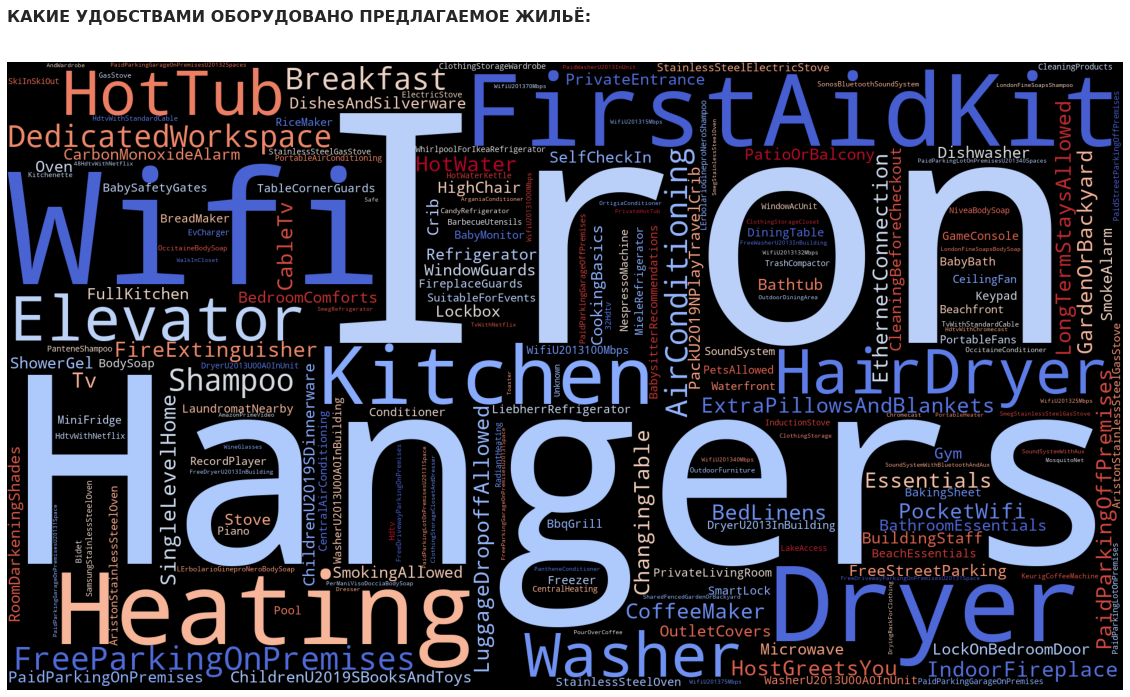

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
wordcloud = WordCloud(background_color='black', width=1920, height=1080, colormap='coolwarm',  max_words=200,  min_font_size=8).generate(" ".join(amenities_col['amenity']))
plt.imshow(wordcloud)
plt.title("КАКИЕ УДОБСТВАМИ ОБОРУДОВАНО ПРЕДЛАГАЕМОЕ ЖИЛЬЁ:",  fontsize=16, fontweight="bold", loc='left', pad=40)
plt.axis('off')
plt.show()

***ВЫВОД:*** Чаще всего для удобства гостей есть вешалки, утюг, вай-фай, фен, обогреватель,  предметы первой необходимости и набор первой помощи,  телевизор, кондиционер, кухня, стиральная машина, отдельное пространство для работы, горячая вода, гидромассажная ванна, кофемашина, лифт и даже парковочное место. Из более редкого и необычного предлагают, например, детскую ванночку и кроватку, фортепиано, пуровер для кофе, рисоварку и хлебопечку, сейф, спортзал и бассейн, возможность курения в помещении и пребывания с домашними животными.

В списке удобств можно также найти пункт **"возможность долговременного проживания"**. Чаще всего Airbnb воспринимают как сервис именно для краткосрочного проживания, но так ли это?

Text(0.5, 0, 'Range of days')

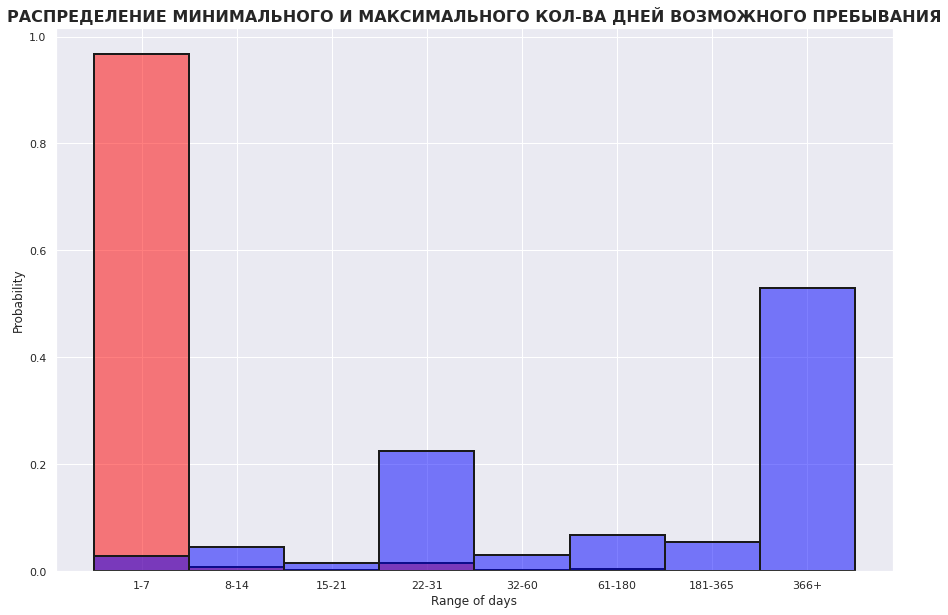

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(data=listings, x='minimum_nights_cat', color='red',  discrete=True, alpha=0.5, stat='probability', edgecolor="k", linewidth=2)
sns.histplot(data=listings, x='maximum_nights_cat', color='blue', discrete=True, alpha=0.5, stat='probability', edgecolor="k", linewidth=2)
plt.title('РАСПРЕДЕЛЕНИЕ МИНИМАЛЬНОГО И МАКСИМАЛЬНОГО КОЛ-ВА ДНЕЙ ВОЗМОЖНОГО ПРЕБЫВАНИЯ',  fontsize=16, fontweight="bold")
plt.xlabel("Range of days")


* ***1-7 дней*** - примерно в 97% размещенных объявлений рассматривается именно этот период, как минимально возможное время пребывания, и только 3% объявлений, в которых максимальное время пребывания также ограничено этим периодом
* ***8-14 дней*** - около 1% указали этот период как минимальное время проживания и 5% как максимальное
* ***15-21 день*** - практически не указано, как минимальное время, как максимальное около 2%
* ***22-31 день*** - есть около 2% объявлений, в которых минимальное время аренды 3-4 недели, этим же периодом ограничивают максимальное время пребывания около 22% владельцев недвижимости (здесь скорее всего имеет место юридический аспект - согласно местному законодательству, аренда недвижимости свыше 30 дней должна сопровождаться заключением договора, зарегистрированного в налоговых органах, и как результат, уплатой налога на доход с аренды https://www.agenziaentrate.gov.it)

В результате, минимальное время аренды, за исключением единичных объявлений (часть из которых похожи на временно не используемые), ограничено периодом от 1 до 31 дня. Оставшиеся 68% ограничений на максимальное время аренды распределились так:
* ***32-60 дней*** -  для 3% объявлений
* ***61-180 дней*** -  для 7% объявлений
* ***181-365 дней*** - для 5% объявлений
* ***366+ дней*** - и около 53% объявлений предлагают максимальный срок от года и выше

***ВЫВОД:*** Airbnb - это не только про краткосрочную аренду, если есть время и возможность, с помощью сервиса можно найти жилье и на достаточно длительный период


***Но так ли легко забронировать недвижимость?*** Много ли свободных дней для аренды могут предоставить хосты на ближайший год?

Text(0.5, 1.0, 'КОЛИЧЕСТВО ДНЕЙ СВОБОДНЫХ ДЛЯ БРОНИРОВАНИЯ НА БЛИЖАЙШИЕ 365 ДНЕЙ')

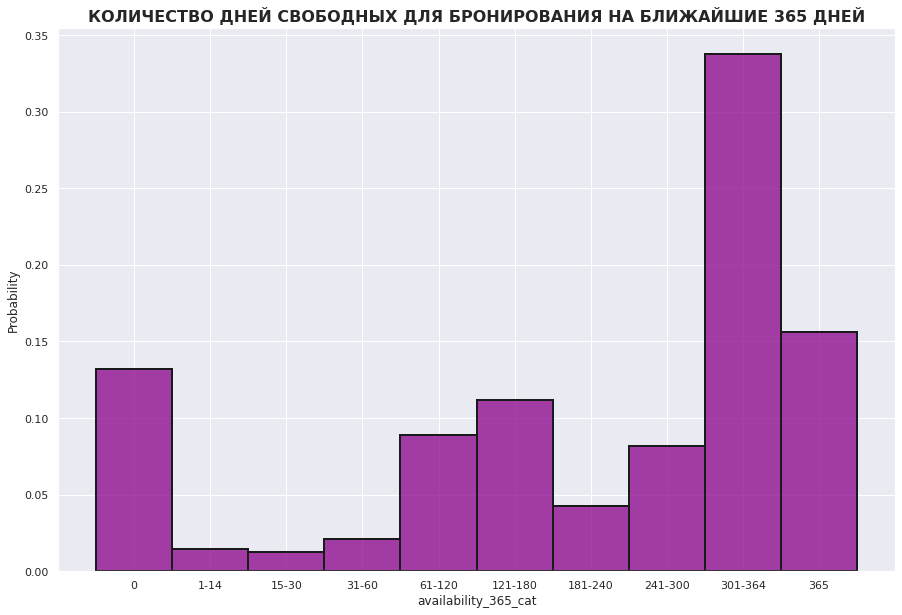

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(data=listings, x='availability_365_cat', color='darkmagenta', discrete=True, stat='probability', edgecolor="k", linewidth=2)
plt.title('КОЛИЧЕСТВО ДНЕЙ СВОБОДНЫХ ДЛЯ БРОНИРОВАНИЯ НА БЛИЖАЙШИЕ 365 ДНЕЙ',  fontsize=16, fontweight="bold")

* ***0 свободных дней*** - 13% недвижимости не имеют свободных дней бронирования или временно прекратили её сдачу, закрыв календарь
* ***1-14 свободных дней*** - 2% недвижимости
* ***15-30 свободных дня*** - 1% недвижимости
* ***31-60 свободных дней*** - 2% недвижимости  
* ***61-120 дней*** - 9% недвижимости 
* ***121-180 дней*** - 11% недвижимости
* ***181-240 дней*** - 4% недвижимости
* ***241-300 дней*** - 8% недвижимости 
* ***301-364 дней*** - 34% недвижимости
* ***365 дней*** - 16% недвижимости, то есть недвижимость готова к сдаче, но не имеет ни одного бронирования на ближайший год


***ВЫВОД:***Из-за вариативности интепретации, возникает сложность с адекватной оценкой этого критерия - в случае, малого доступного количества свободных дней для аренды, есть как минимум два варианта: или хост открывает бронирование постепенно на небольшое количество дней, или бронь действительно практически полная. Но в любом случае, есть 16% недвижимости полностью доступной для бронирования в течение года


***Выводы по исследованию:***
* Читайте отзывы и смотрите на их количество - так проще подобрать лучшее предложение .
* Изучите критерии оценки объявления в отзывах, посмотрите, из каких критериев получилась общая оценка и ориентируйтесь на то, что для вас более важно.
Стоит выбрать жилье в центре или близких к нему районах, если цель посещения города туризм и знакомство с достопримечательностями. Проще всего в центре будет найти отдельную квартиру с одной спальной и ванной комнатой для пары гостей. Большинство хостов предоставит базовый набор удобств для проживания, а кто-то возможно даже удивит, предложив что-то необычное.
* Большая часть предложений лежит в сегменте до 200 евро за ночь, но даже в центре есть объявления на любой кошелек (от 7€ до 3735€) .Из известных по данным факторов, цена будет строится исходя из количества гостей, спальных комнат и кроватей, а также количества ванных и является ли она личной или общей.
* Хост - это может быть не только частное лицо, если это необходимо, можно найти и представителей отелей и гостевых домов.
* Не стоит искать недвижимость только среди объявлений с категорией суперхост, особенно, если вам нужно просто переночевать - разница между хостом и суперхостом невелика. Но, если вы гостите у суперхоста, то скорее всего получите более стабильный сервис и радушный прием.
* Стоит обратить внимание на то, чтобы аккаунт хоста был верифицирован сервисом airbnb, тем более, таких хостов большинство - это вопрос спокойствия и безопасности проживания.
* Если это необходимо, то можно найти и жилье для долговременной аренды, сервис это тоже позволяет.
